* 해당 노트북은 YouTube [todaycode오늘코드](https://www.youtube.com/channel/UCLR3sD0KB_dWpvcsrLP0aUg) 강의를 기반으로 작성했습니다.
* 참고한 .ipynb는 다음과 같습니다.[seoul-covid-19-02-eda-output.ipynb](https://colab.research.google.com/github/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda-output.ipynb#scrollTo=IGUx3sdwKXCE)
* 이번 노트북에서 진행한 EDA는 다음과 같습니다.
<img src="img/EDA.PNG" />

# 서울시에서 공개한 코로나19 발생동향 분석
이 노트북은 서울시에서 제공하는 코로나 발생 동향 데이터의 여러개의 칼럼 데이터를 중심으로 다양한 관점에서 EDA를 수행한 파일입니다. 코로나 발생 동향 데이터는 [이곳](https://www.seoul.go.kr/coronaV/coronaStatus.do) 웹사이트를 통해 크롤링 할 수 있습니다. 또한, 해당 웹사이트의 테이블 구조가 바뀔 수 있기 때문에 이에 맞춰서 데이터 크롤링을 수행해야 합니다. 이 노트북은 2021년1월31일 까지 코로나 현황 데이터를 크롤링하여 분석을 수행했습니다.

In [157]:
import pandas as pd
import numpy as np

file_name = f'data/seoul-covid19-2021_02_01.csv'
df = pd.read_csv(file_name)
df = df.sort_values(by="연번", ascending=False)
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,24395,78560,2021-02-01,마포구,-,감염경로 조사중,NaN
1,24394,78588,2021-02-01,타시도,-,감염경로 조사중,NaN
2,24393,78822,2021-02-01,강남구,-,기타 확진자 접촉,NaN
3,24392,78826,2021-02-01,관악구,-,광진구 음식점 관련,NaN
4,24391,78825,2021-02-01,관악구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
24390,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
24391,4,7,2020-01-30,마포구,중국,해외유입,퇴원
24392,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
24393,2,5,2020-01-30,중랑구,중국,해외유입,퇴원


* 최초 서울시에서 발생한 코로나 확진자는 2020년 1월 24일 중국에 여행력을 가진 강서구 거주자입니다. 
* 데이터 수집 시점(2021년 2월 2일)을 기준으로 가장 최근에 발생한 확진자는 마포구에 거주하는 환자입니다.

# 시각화 도구 불러오기

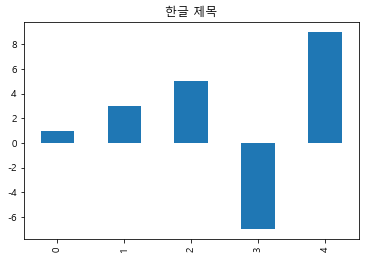

In [2]:
import matplotlib.pyplot as plt
# 한글 설정 -> plt.rc 사용
plt.rc("font", family="Malgun Gothic") # Windows
#plt.rc("font", family="AppleGothic") # Mac

# 마이너스(-) 기호 표시를 위한 설정
plt.rc("axes", unicode_minus=False) 

pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

## 시각화 선명하게 설정하기

In [3]:
# retina를 지원한다면, 시각화 폰트를 좀 더 선명하게 볼 수 있습니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 확진일

확진일 칼럼의 빈도수를 확인하면, 대부분 2020년 12월에 확진자수가 많은 것을 알 수 있습니다.

In [4]:
df["확진일"].value_counts()

2020-12-17    588
2020-12-24    566
2020-12-28    525
2020-12-25    431
2020-12-16    427
             ... 
2020-04-24      1
2020-04-19      1
2020-04-18      1
2020-05-17      1
2020-05-01      1
Name: 확진일, Length: 343, dtype: int64

확진일 칼럼 데이터 타입을 datetime으로 변경합니다.

In [5]:
df["확진일"] = pd.to_datetime(df["확진일"])

확진일 데이터에서 '년도'만 추출하여 새로운 칼럼에 저장합니다. **(데이터를 전처리 할 때는 새로운 칼럼을 생성해서 전처리한 결과를 저장하는 것이 좋습니다.)**

In [6]:
df["년"] = df["확진일"].dt.year
df[["확진일", "년"]]

,확진일,년
0,2021-02-01,2021
1,2021-02-01,2021
2,2021-02-01,2021
3,2021-02-01,2021
4,2021-02-01,2021
...,...,...
24390,2020-01-31,2020
24391,2020-01-30,2020
24392,2020-01-30,2020
24393,2020-01-30,2020


확진일 데이터에서 '월'만 추출하여 새로운 칼럼에 저장합니다.**(데이터를 전처리 할 때는 새로운 칼럼을 생성해서 전처리한 결과를 저장하는 것이 좋습니다.)**

In [7]:
df["월"] = df["확진일"].dt.month
df[["확진일", "년", "월"]]

,확진일,년,월
0,2021-02-01,2021,2
1,2021-02-01,2021,2
2,2021-02-01,2021,2
3,2021-02-01,2021,2
4,2021-02-01,2021,2
...,...,...,...
24390,2020-01-31,2020,1
24391,2020-01-30,2020,1
24392,2020-01-30,2020,1
24393,2020-01-30,2020,1


확진일 데이터에서 '주'를 계산하여 새로운 칼럼에 저장합니다. 그 결과, 2020-01-24(4주차)를 기준으로 2021-01-03(53주차)까지 계산하고, 2021-01-04(1주차)를 기준으로 데이터 수집 시점까지 '주'를 계산합니다.

In [8]:
df["주"] = df["확진일"].dt.week
df[["확진일", "년", "월", "주"]]

<ipython-input-8-9296de6e7598>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일"].dt.week


,확진일,년,월,주
0,2021-02-01,2021,2,5
1,2021-02-01,2021,2,5
2,2021-02-01,2021,2,5
3,2021-02-01,2021,2,5
4,2021-02-01,2021,2,5
...,...,...,...,...
24390,2020-01-31,2020,1,5
24391,2020-01-30,2020,1,5
24392,2020-01-30,2020,1,5
24393,2020-01-30,2020,1,5


## 선그래프 그리기
전체 날짜를 기준으로 확진자 발생 분포를 선그래프로 확인합니다.

날짜 순서대로 시각화하기 위해 sort_index()를 수행합니다.

In [9]:
df["확진일"].value_counts().sort_index()

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-01-28    113
2021-01-29    151
2021-01-30    101
2021-01-31    107
2021-02-01    128
Name: 확진일, Length: 343, dtype: int64

df.plot()은 기본적으로 '선그래프'를 그리며, 확진자 분포 특징을 알아보기 쉽도록 plt.axhline()을 수행하여 x축과 평행한 라인을 출력합니다.

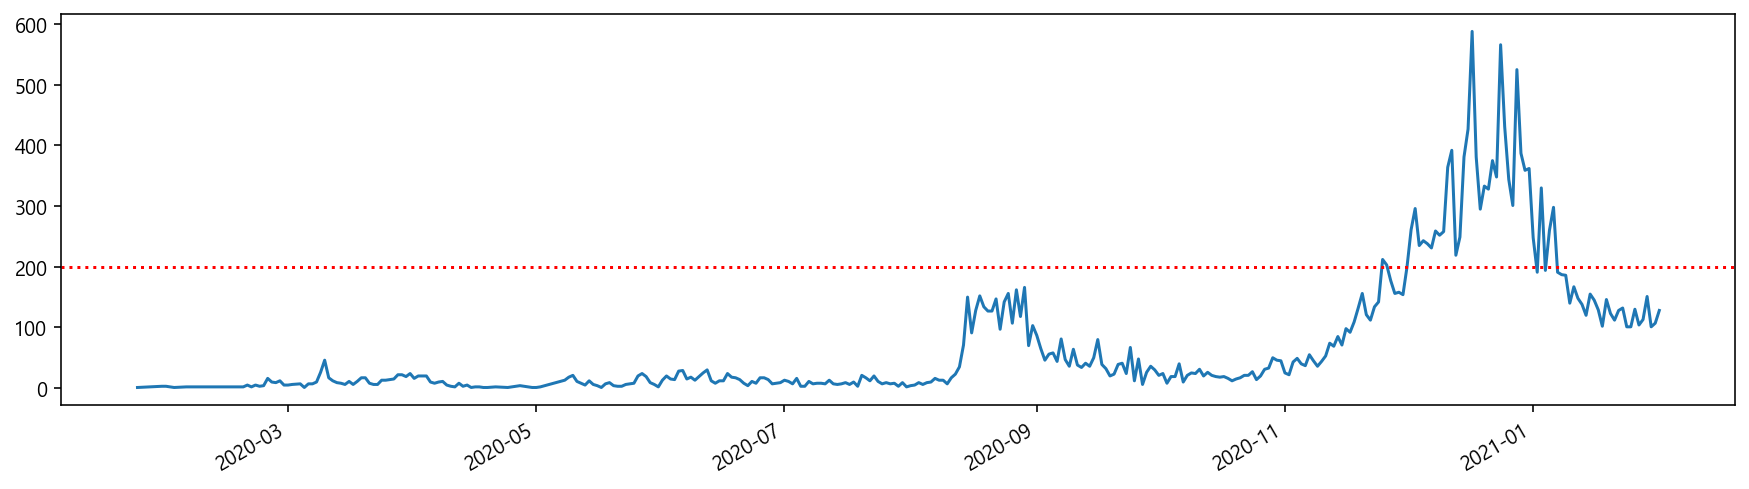

In [10]:
df["확진일"].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(200, color='red', linestyle=":")

서울시에서는 2020년 8월 전까지도 꾸준히 확진자가 발생했지만, 해당 시점 이후로 폭발적으로 증가한 것을 알 수 있습니다. 또한, 2020년 11월 이후로 2021년 1월에 이르기까지 확진자수는 이전보다 훨씬 급증하여 하루 600명에 이르는 확진자가 발생하기도 했습니다.

## 확진자가 가장 많이 나온날
데이터 수집 시점(2021년2월2일)을 기준으로 확진자가 가장 많이 나온날을 좀 더 자세히 살펴보겠습니다.

In [11]:
day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-01-28    113
2021-01-29    151
2021-01-30    101
2021-01-31    107
2021-02-01    128
Name: 확진일, Length: 343, dtype: int64

In [12]:
day_count.describe()

count    343.000000
mean      71.122449
std      104.464534
min        1.000000
25%        8.000000
50%       20.000000
75%      102.500000
max      588.000000
Name: 확진일, dtype: float64

데이터 수집 시점(2021년2월2일)을 기준으로 2020년12월17일에 서울시에 가장 많은 588명 확진자가 발생했습니다. 

In [13]:
day_count[day_count == day_count.max()]

2020-12-17    588
Name: 확진일, dtype: int64

확진자가 가장 많은 2020년12월17일에 데이터를 살펴봤습니다.

In [14]:
df[df["확진일"]=='2020-12-17'].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주
7297,17098,48368,2020-12-17,타시도,-,감염경로 조사중,퇴원,2020,12,51
7376,17019,54793,2020-12-17,종로구,-,감염경로 조사중,퇴원,2020,12,51
9688,14707,49665,2020-12-17,기타,-,동부구치소 관련,NaN,2020,12,51
9689,14706,49664,2020-12-17,기타,-,동부구치소 관련,퇴원,2020,12,51
9690,14705,49663,2020-12-17,기타,-,동부구치소 관련,퇴원,2020,12,51


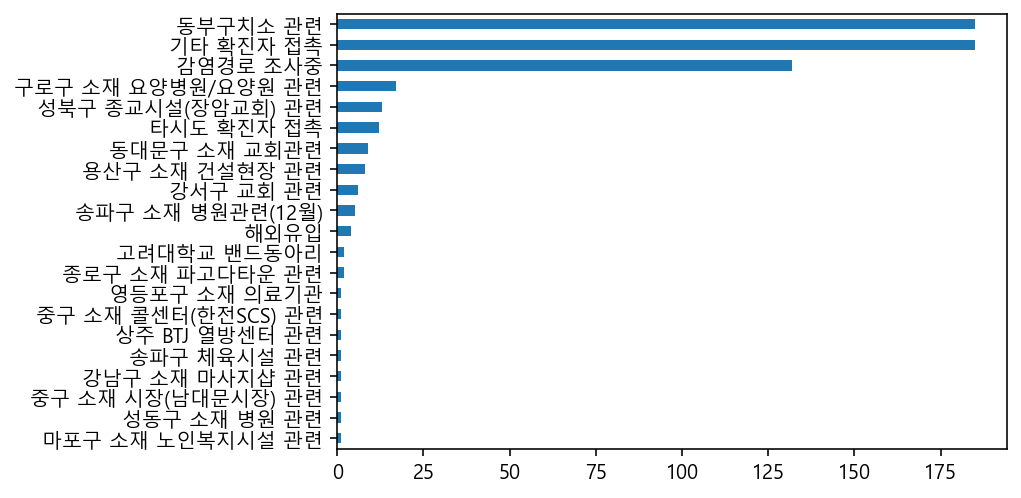

In [15]:
df[df["확진일"]=='2020-12-17']["접촉력"].value_counts().sort_values().plot.barh()

2020년12월17일에 발생한 대다수 확진자는 동부구치소 관련된 경우와 다른 확진자 접촉으로 인한 n차 감염이 가장 많았고, 아직 감염 경로를 조사중인 확진자가 뒤를 따르고 있습니다.

## 최근 데이터만 슬라이싱으로 나눠 그리기
데이터 수집 시점(2021년2월2일)을 기준으로 최근 50일 간의 서울시 확진자 발생 추이를 시각화하여 2020년 12월에 가장 많이 발생한 것을 알 수 있었습니다.

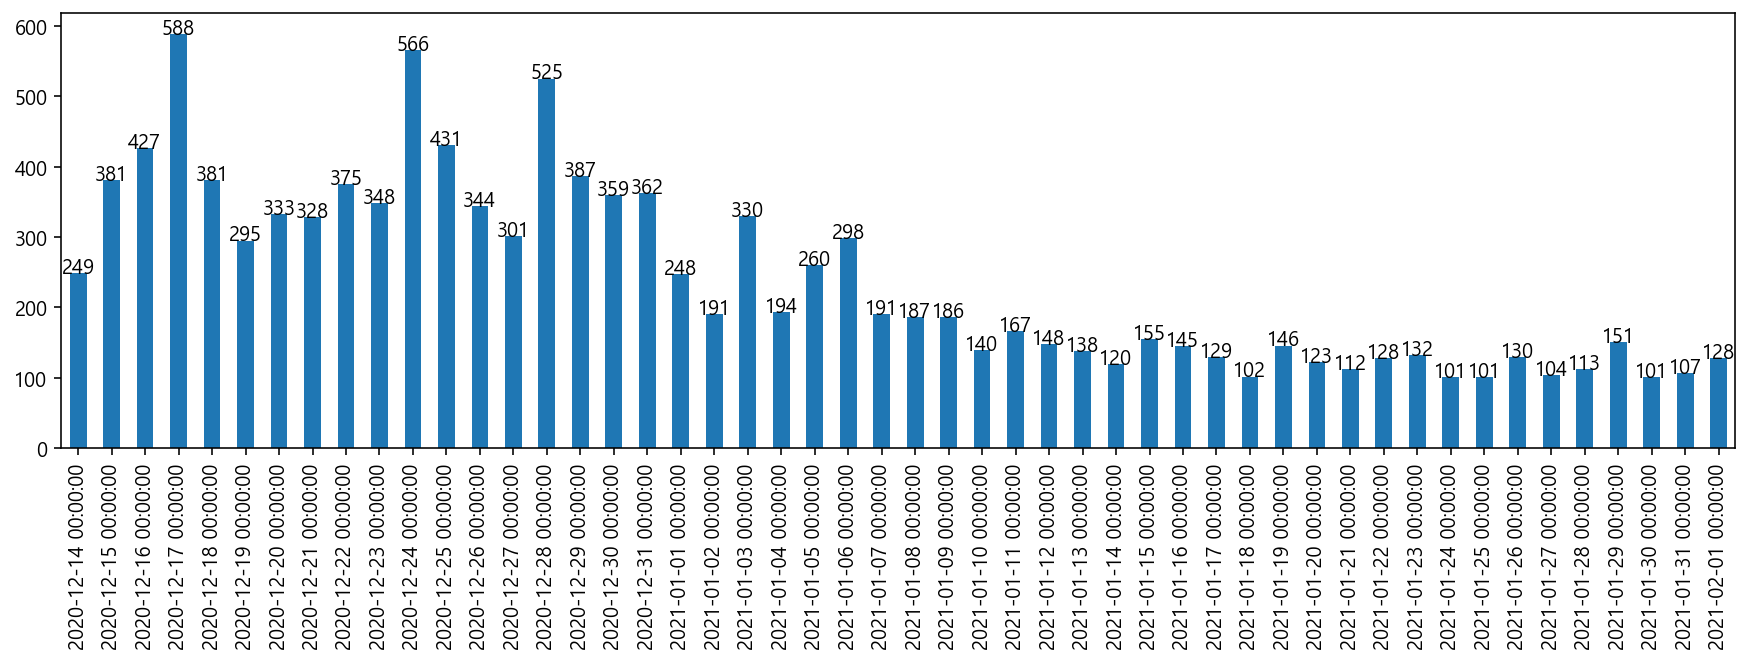

In [16]:
# 최근 50일 간의 추이만 시각화
g = day_count[-50:].plot.bar(figsize=(15,4))

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

## 월별 확진자 수 그리기
확진자수를 월별로 좀 더 세밀하게 분석하여 12월, 1월 순으로 확진자가 많았음을 알 수 있었습니다.

In [17]:
df["월"].value_counts()

12    10428
1      4885
11     2904
8      2415
9      1306
10      733
6       459
3       391
7       281
5       229
2       208
4       156
Name: 월, dtype: int64

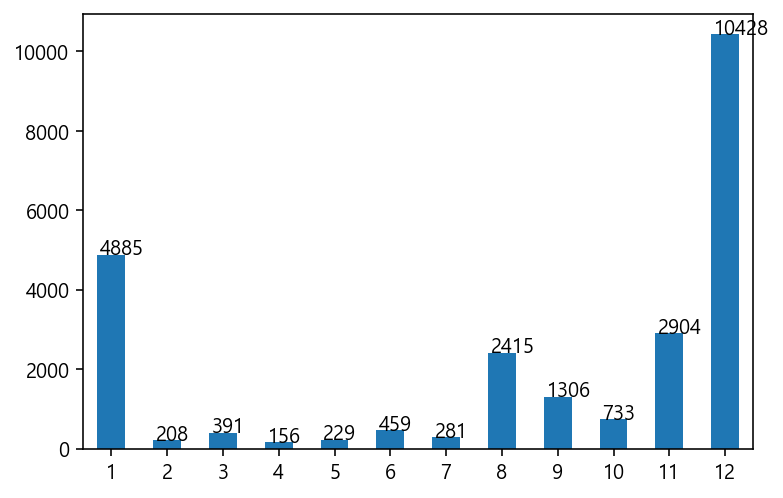

In [18]:
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

또한, 2020년과 2021년을 분리해서 동일한 절차를 수행한 결과, 1월에 발생한 확진자는 대다수 2021년 1월에 발생했음을 알 수 있었습니다. 2020년12월에 이어 확진자가 지속 발생했음을 알 수 있습니다.

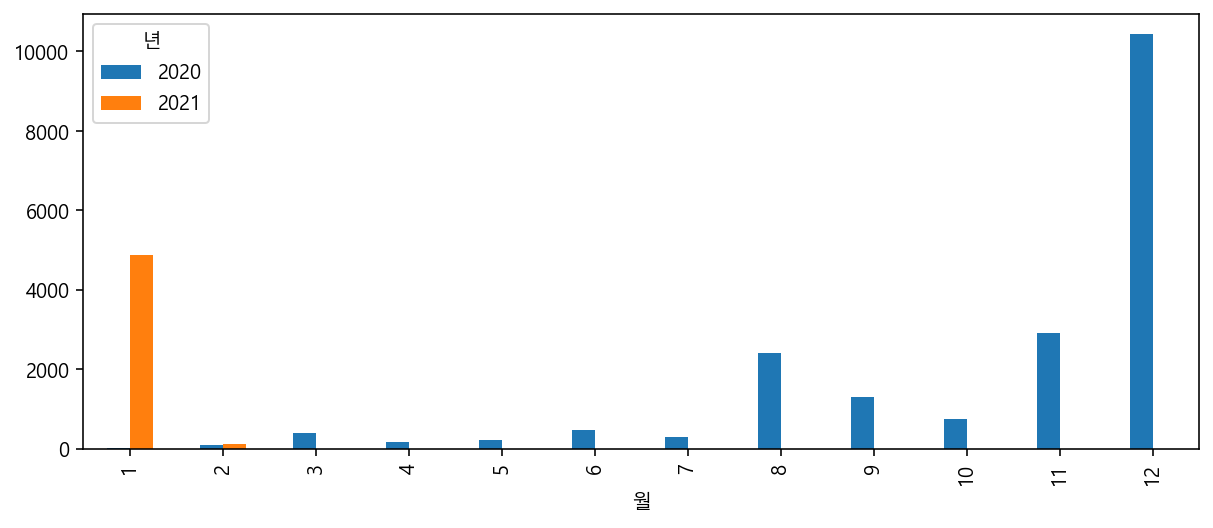

In [19]:
df.groupby(["월", "년"])["연번"].count().unstack().plot.bar(figsize=(10,4))

## 주단위 확진자 수 그리기
'주' 단위로 확진자수 추이를 분석한 결과, 1주차에서 약 5주차까지는 2021년에 발생한 코로나 확진자의 영향이 있음을 알 수 있습니다.

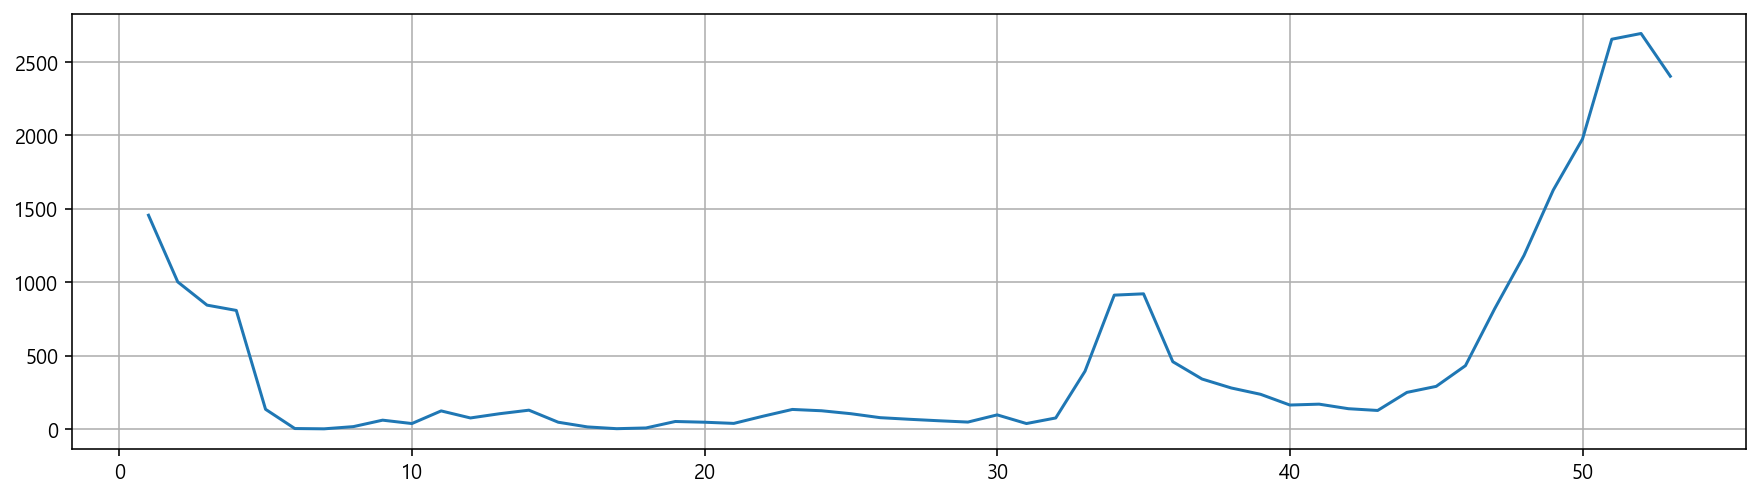

In [20]:
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))
plt.grid(True)

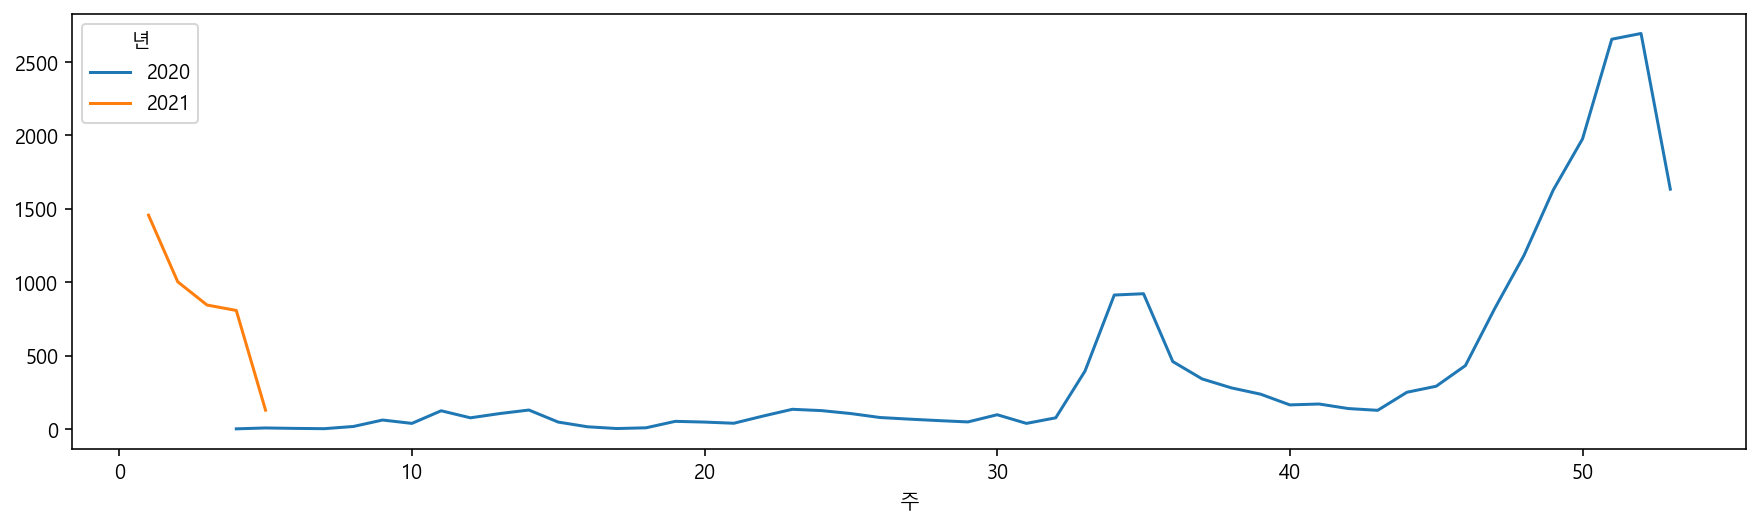

In [21]:
df.groupby(["주", "년"])["연번"].count().unstack().plot(figsize=(15,4))

In [22]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주
0,24395,78560,2021-02-01,마포구,-,감염경로 조사중,NaN,2021,2,5
1,24394,78588,2021-02-01,타시도,-,감염경로 조사중,NaN,2021,2,5
2,24393,78822,2021-02-01,강남구,-,기타 확진자 접촉,NaN,2021,2,5
3,24392,78826,2021-02-01,관악구,-,광진구 음식점 관련,NaN,2021,2,5
4,24391,78825,2021-02-01,관악구,-,감염경로 조사중,NaN,2021,2,5
...,...,...,...,...,...,...,...,...,...,...
24390,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,5
24391,4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,5
24392,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,5
24393,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,5


# 각 날짜별 확진자수를 저장한 데이터프레임 생성
각 날짜별 발생한 확진자수만 저장한 새로운 데이터프레임을 생성합니다. 이 때, 확진자가 발생하지 않은 날짜에는 Nan으로 채웁니다.
* step 1) 전체 날짜를 저장하고 있는 새로운 데이터프레임 생성합니다.
* step 2) 기존 df에서 각 확진날짜에 발생한 확진자수 추출합니다. 
* step 3) step 1, 2에서 생성한 데이터프레임을 merge 합니다. 

먼저, 최초 df에서 확진자가 발생하지 않은 날짜가 비어있음을 확인할 수 있습니다.

In [23]:
df["확진일"].astype(str).unique()

array(['2021-02-01', '2021-01-31', '2021-01-30', '2021-01-28',
       '2021-01-29', '2021-01-27', '2021-01-26', '2021-01-25',
       '2020-12-16', '2021-01-22', '2020-11-23', '2021-01-24',
       '2021-01-23', '2021-01-21', '2020-12-27', '2020-12-19',
       '2021-01-20', '2021-01-19', '2021-01-18', '2021-01-17',
       '2020-12-21', '2020-12-25', '2021-01-16', '2021-01-15',
       '2021-01-14', '2021-01-12', '2021-01-13', '2020-12-22',
       '2021-01-11', '2020-12-18', '2021-01-10', '2021-01-09',
       '2021-01-06', '2021-01-08', '2021-01-07', '2021-01-04',
       '2021-01-05', '2021-01-01', '2021-01-02', '2020-12-23',
       '2021-01-03', '2020-12-30', '2020-12-24', '2020-12-31',
       '2020-12-29', '2020-12-26', '2020-12-28', '2020-12-20',
       '2020-12-15', '2020-12-17', '2020-12-12', '2020-12-14',
       '2020-12-13', '2020-12-11', '2020-12-10', '2020-12-09',
       '2020-12-08', '2020-12-07', '2020-12-06', '2020-12-04',
       '2020-12-05', '2020-12-03', '2020-12-02', '2020-

**step 1) 전체 날짜를 저장하고 있는 새로운 데이터프레임 생성하는 과정입니다.**

첫 번째 확진일과 마지막 확진일을 구하는 코드의 실행 시간을 측정하기 위해 %timeit을 사용합니다.

* %timeit: 코드 한 줄을 n번(default: 7번) 실행시킬 때의 평균 소요시간(mean) 및 표준편차(std) 계산

In [24]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주
7207,17188,56557,2020-12-26,금천구,러시아,해외유입,퇴원,2020,12,52


첫 번째 확진일자는 df의 가장 아래 row에 존재하며, 3번째 칼럼에 있습니다.

In [25]:
%timeit first_day = df.iloc[-1, 2] # 첫 번쩨 확진일자

57.3 µs ± 5.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [26]:
%timeit last_day = df.iloc[0, 2] # 최근 확진일자

48.4 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


이 때, first_day나 last_day를 실행하면 정의되어 있지 않은 변수로 판단합니다. 아직 확실하지는 않지만, **위 %timeit은 단순히 코드 실행 시간만 측정하고, 변수를 정의하는 것은 아닌지 확인이 필요할 것 같습니다.** 따라서 아래와 같이 first_day와 last_day 변수를 다시 정의했습니다.

In [27]:
first_day = df.iloc[-1, 2]
last_day = df.iloc[0, 2]

이제 pd.date_range()를 사용하여 first_day(2020-01-24)부터 last_day(2020-06-30) 사이의 모든 날짜를 생성하고, 데이터프레임으로 변환합니다.

In [28]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
               '2021-01-31', '2021-02-01'],
              dtype='datetime64[ns]', length=375, freq='D')

In [29]:
df_days = pd.DataFrame({"확진일자": days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
370,2021-01-28
371,2021-01-29
372,2021-01-30
373,2021-01-31


**step 2) 기존 df에서 각 확진날짜에 발생한 확진자수 추출합니다.**

In [30]:
daily_case = df["확진일"].value_counts()
daily_case

2020-12-17    588
2020-12-24    566
2020-12-28    525
2020-12-25    431
2020-12-16    427
             ... 
2020-03-05      1
2020-04-15      1
2020-01-24      1
2020-04-19      1
2020-04-24      1
Name: 확진일, Length: 343, dtype: int64

In [31]:
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2020-12-17,588
2020-12-24,566
2020-12-28,525
2020-12-25,431
2020-12-16,427
...,...
2020-03-05,1
2020-04-15,1
2020-01-24,1
2020-04-19,1


## merge를 통해 전체 확진일자 만들기
**step 3) step 1, 2에서 생성한 데이터프레임을 merge 합니다.**

In [32]:
all_days = df_days.merge(df_daily_case, left_on="확진일자", right_index=True, how='left')
all_days

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
370,2021-01-28,113.0
371,2021-01-29,151.0
372,2021-01-30,101.0
373,2021-01-31,107.0


우리가 원하는대로 확진자가 발생하지 않은 날짜의 확진수에는 Nan으로 채워 넣은 데이터프레임을 생성할 수 있었습니다.

# 누적 확진자 수 구하기
위에서 생성한 all_days(전체 날짜에 대한 확진자수를 저장) 데이터프레임을 사용하여 누적 확진자수를 계산합니다. <font color='red'>'누적수'는 시간에 따른 변화 또는 추이를 쉽게 확인할 수 있는 지표로 활용할 수 있습니다.</font>

all_days 데이터프레임의 Nan을 '0'으로 채우고, 누적합(cumsum)을 계산한 값을 새로운 칼럼으로 저장합니다. **(데이터를 전처리 할 때는 새로운 칼럼을 생성해서 전처리한 결과를 저장하는 것이 좋습니다.)**

In [33]:
all_days["확진수"] = all_days["확진수"].fillna(0)
all_days["누적확진"] = all_days["확진수"].cumsum()
all_days

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
370,2021-01-28,113.0,23908.0
371,2021-01-29,151.0,24059.0
372,2021-01-30,101.0,24160.0
373,2021-01-31,107.0,24267.0


위 결과를 선 그래프로 시각화하기 위해 확진일자 칼럼을 데이터프레임 index로 설정합니다.

In [34]:
cum_day = all_days.set_index("확진일자")
cum_day.head()

,확진수,누적확진
확진일자,,
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0


## 데이터프레임으로 그리기
df.plot()을 사용하여 선 그래프로 시각화한 결과입니다. 2020년8월 이전까지는 누적 확진수가 꾸준히 증가하다가 이후로 증가폭이 커짐을 알 수 있습니다. 또한, 2020년11월부터는 누적 확진자수가 매우 가파르게 증가함을 알 수 있습니다.

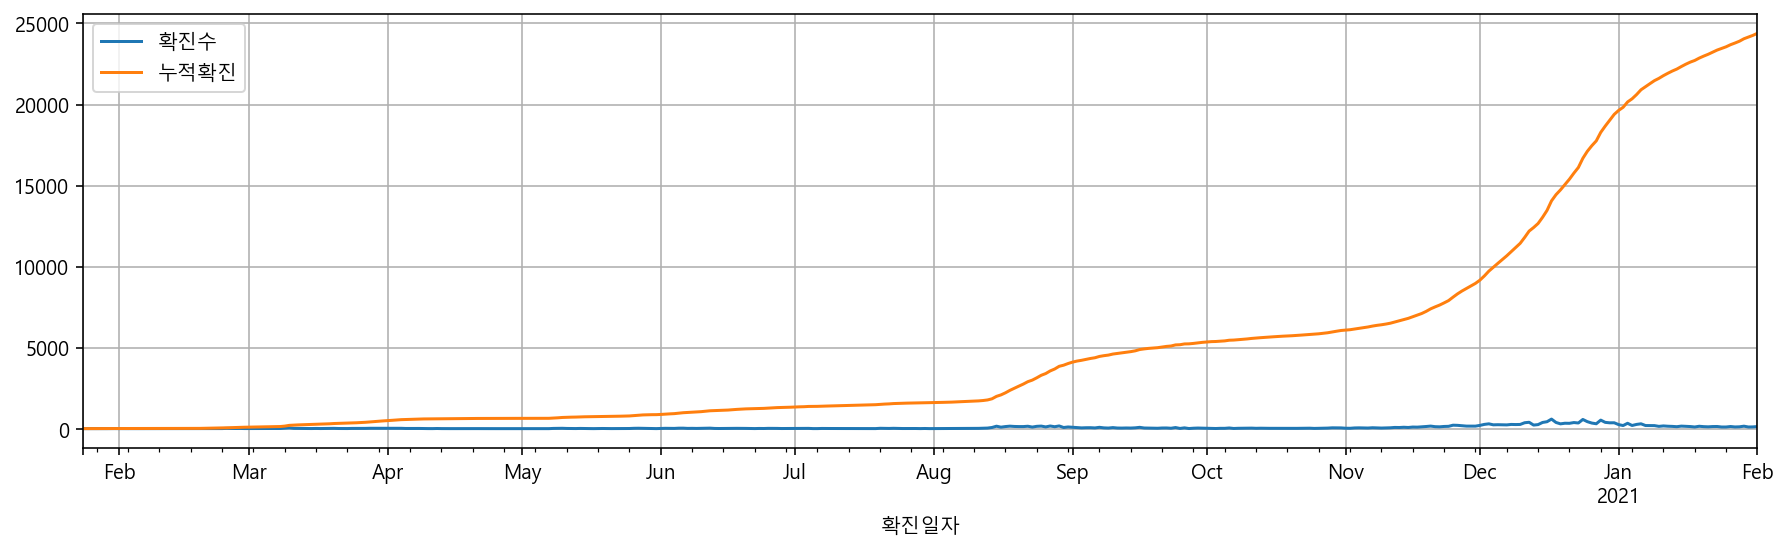

In [35]:
cum_day.plot(figsize=(15,4))
plt.grid(True)

## 시리즈로 그리기
위와 동일한 시각화 결과를 확진수 칼럼 Series와 누적확진 칼럼 Series를 각각 plot()을 수행하여 나타낼 수 있습니다.

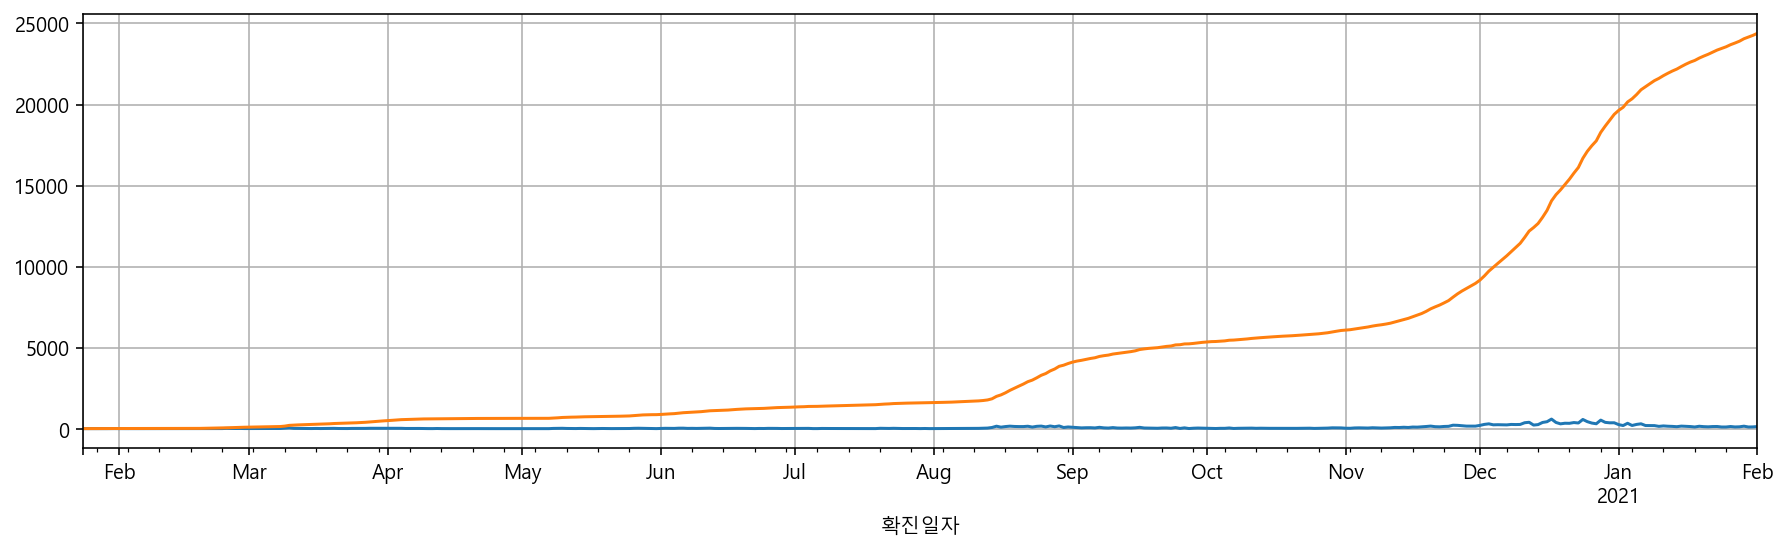

In [36]:
cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15,4))
plt.grid(True)

## 확진수만 따로 그리기
누적확진수와 확진수 간의 차이가 크기 때문에 확진수만 따로 시각화를 수행했습니다. 그 결과 처음에 **3.1  선그래프 그리기**에서 도출한 확진자수를 분포를 확인할 수 있었습니다.

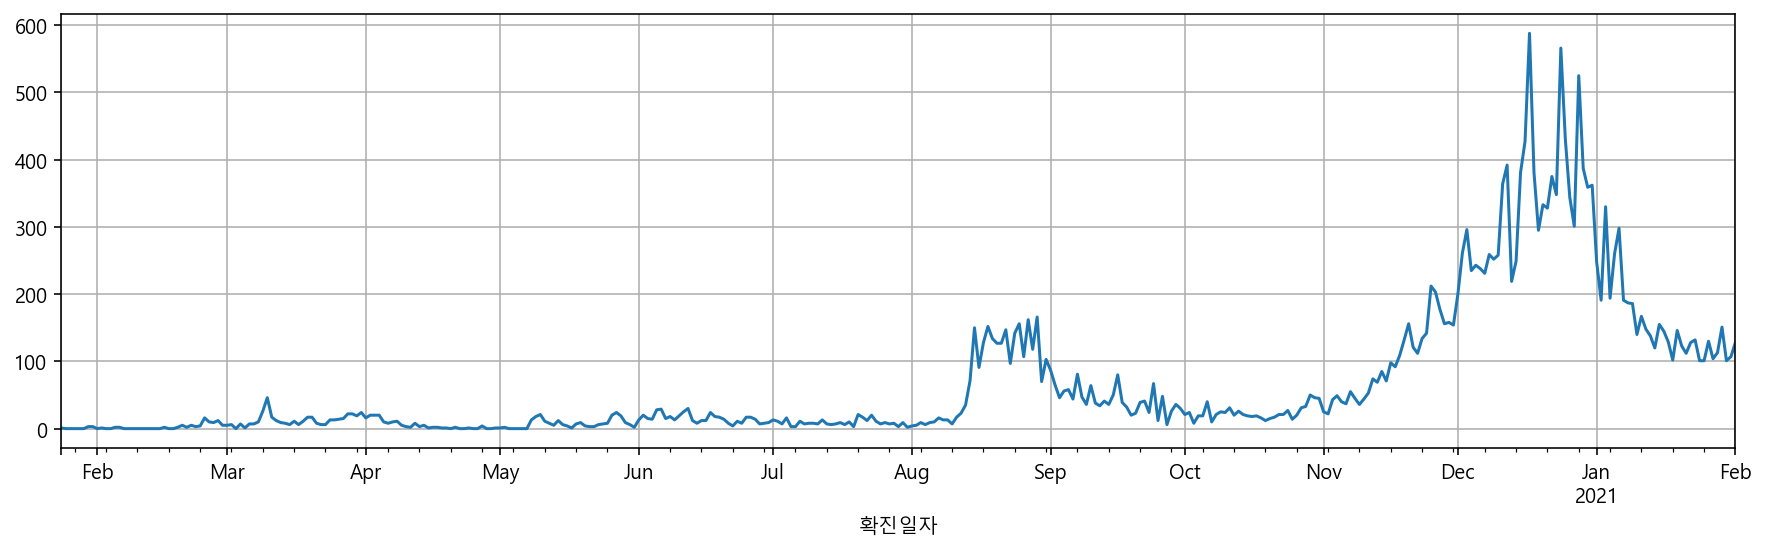

In [37]:
cum_day["확진수"].plot(figsize=(15,4))
plt.grid(True)

## 누적확진만 따로 그리기
마찬가지로, 누적확진만 따로 시각화를 수행했습니다.

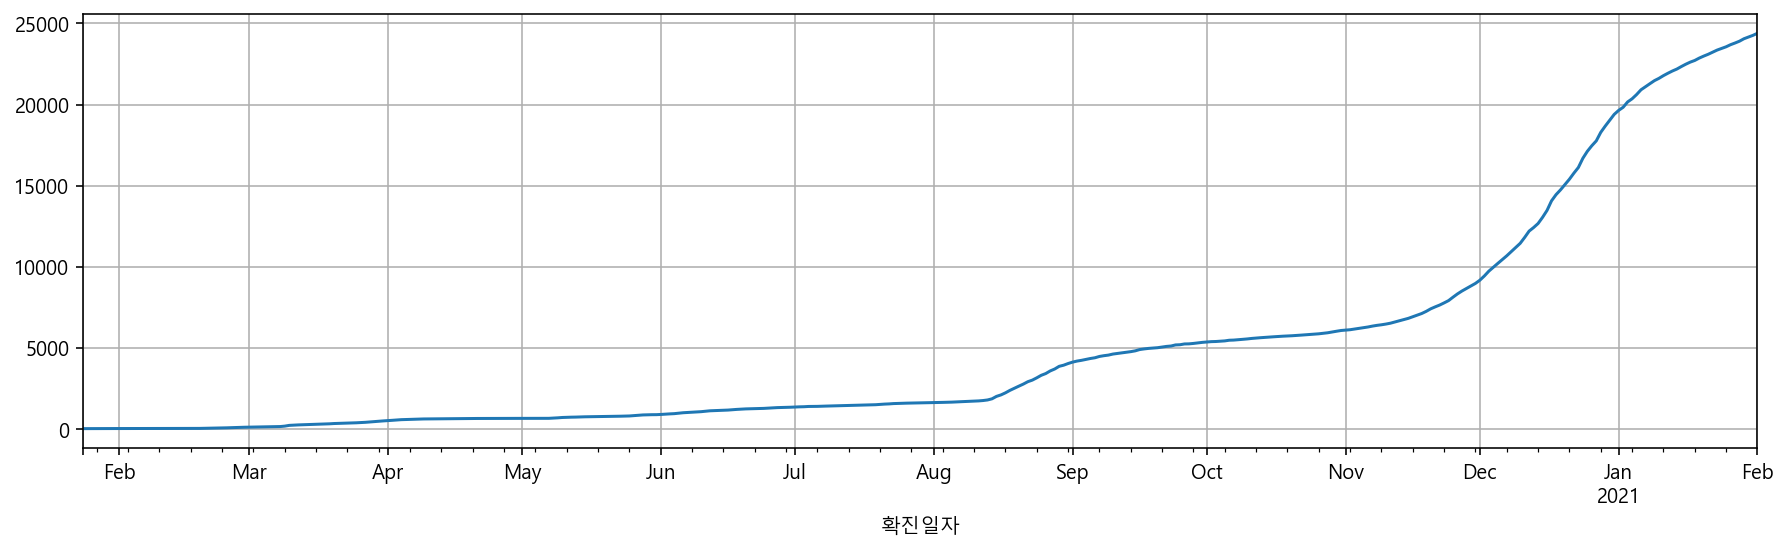

In [38]:
cum_day["누적확진"].plot(figsize=(15,4))
plt.grid(True)

## 로그 스케일
시각화 한 데이터 간의 차이가 너무 큰 경우에는 '로그 스케일'로 변환하면, 더 쉽게 알아볼 수 있습니다. 
* '로그 스케일'은 상대적으로 작은값은 큰 값으로 스케일링하고, 큰 값은 작은값으로 스케일링하는 특성이 있기 때문에 **작은값의 분포를 좀 더 자세히 확인할 수 있습니다.** 
* 확진자가 없는 날의 '0'은 로그 스케일로 변환 시, (-) 무한대로 발산하므로, 아래와 같이 라인이 중간에 짤려 있습니다. 하지만, 대다수 날짜에 확진자가 발생했음을 알 수 있습니다.

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


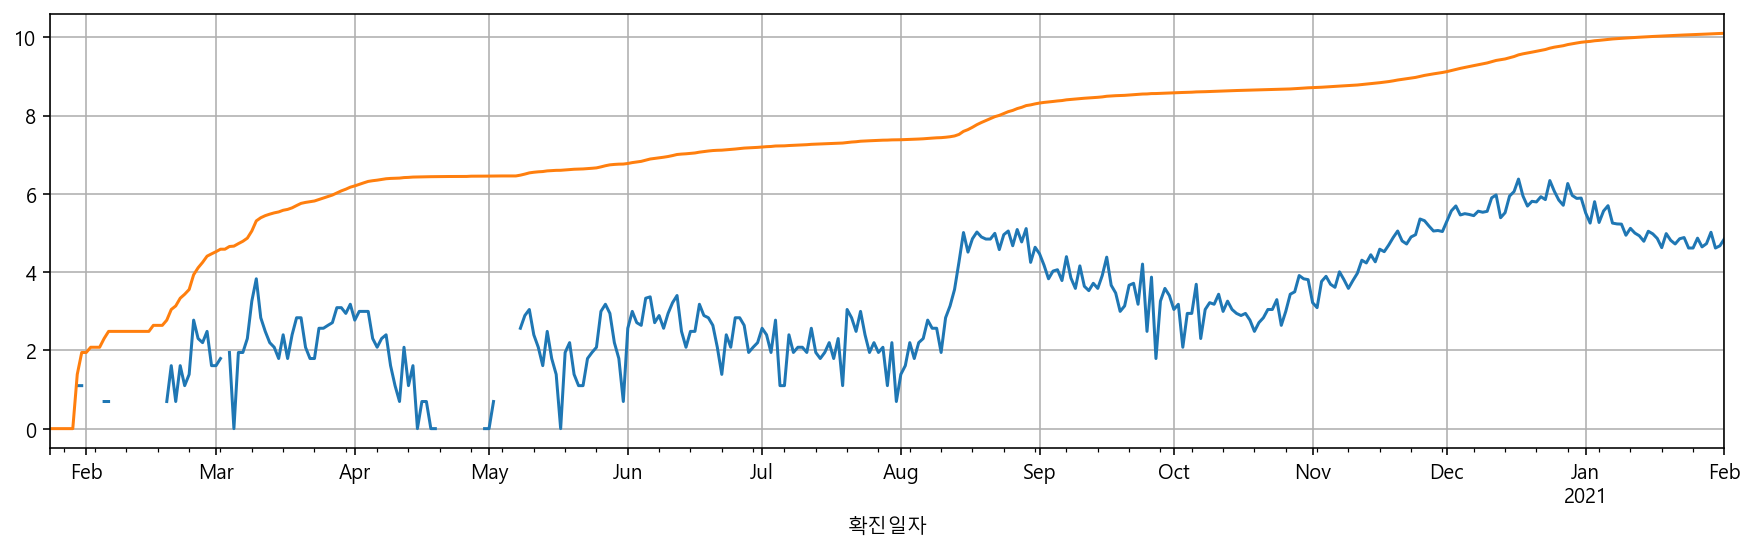

In [39]:
np.log(cum_day["확진수"]).plot(figsize=(15,4))
np.log(cum_day["누적확진"]).plot()
plt.grid(True)

## 확진월과 요일 구하기
확진수와 누적확진을 '년도', '월'과 '요일' 단위로 확인하기 위해 새로운 칼럼을 생성합니다. **(데이터를 전처리 할 때는 새로운 칼럼을 생성해서 전처리한 결과를 저장하는 것이 좋습니다.)**

In [40]:
all_days.sample()

,확진일자,확진수,누적확진
267,2020-10-17,19.0,5689.0


In [41]:
all_days["확진년도"] = all_days["확진일자"].dt.year
all_days["확진월"] = all_days["확진일자"].dt.month
all_days["확진요일"] = all_days["확진일자"].dt.dayofweek
all_days.head()

,확진일자,확진수,누적확진,확진년도,확진월,확진요일
0,2020-01-24,1.0,1.0,2020,1,4
1,2020-01-25,0.0,1.0,2020,1,5
2,2020-01-26,0.0,1.0,2020,1,6
3,2020-01-27,0.0,1.0,2020,1,0
4,2020-01-28,0.0,1.0,2020,1,1


# 요일별 확진 수
2020년도와 2021년의 요일별 확진자 수를 시각화합니다. 먼저, 2020년 데이터와 2021년 데이터를 분리합니다.

In [42]:
all_days_2020 = all_days[all_days["확진년도"]==2020]
all_days_2020.head()

,확진일자,확진수,누적확진,확진년도,확진월,확진요일
0,2020-01-24,1.0,1.0,2020,1,4
1,2020-01-25,0.0,1.0,2020,1,5
2,2020-01-26,0.0,1.0,2020,1,6
3,2020-01-27,0.0,1.0,2020,1,0
4,2020-01-28,0.0,1.0,2020,1,1


In [43]:
all_days_2021 = all_days[all_days["확진년도"]==2021]
all_days_2021.head()

,확진일자,확진수,누적확진,확진년도,확진월,확진요일
343,2021-01-01,248.0,19637.0,2021,1,4
344,2021-01-02,191.0,19828.0,2021,1,5
345,2021-01-03,330.0,20158.0,2021,1,6
346,2021-01-04,194.0,20352.0,2021,1,0
347,2021-01-05,260.0,20612.0,2021,1,1


2020년, 2021년으로 분리한 데이터를 (확진월, 확진요일)별로 그룹핑 이후에, unstack을 수행하여 pivot 형태로 생성합니다.

In [44]:
# 2020
all_day_2020_week = all_days_2020.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_2020_week = all_day_2020_week.unstack()
all_day_2020_week.columns = ["월", "화", "수", "목", "금", "토", "일"]

# 2021
all_day_2021_week = all_days_2021.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_2021_week = all_day_2021_week.unstack(fill_value=0)
all_day_2021_week.columns = ["월", "화", "수", "목", "금", "토", "일"]

2020년
* 앞에서 살펴본 것과 같이 8월에 확진자가 급증하다가 잠잠해졌으며, 11월 이후로 다시 급증하는 것을 확인할 수 있습니다.

In [45]:
all_day_2020_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000
2,4.000000,16.000000,14.000000,16.000000,14.000000,10.000000,6.000000
3,68.000000,89.000000,48.000000,44.000000,48.000000,45.000000,49.000000
4,15.000000,17.000000,28.000000,28.000000,26.000000,23.000000,19.000000
5,26.000000,37.000000,33.000000,34.000000,32.000000,36.000000,31.000000
6,55.000000,65.000000,66.000000,74.000000,92.000000,69.000000,38.000000
7,38.000000,42.000000,42.000000,57.000000,34.000000,40.000000,28.000000
8,389.000000,331.000000,273.000000,334.000000,332.000000,480.000000,276.000000
9,182.000000,261.000000,235.000000,216.000000,138.000000,160.000000,114.000000


2020년
* 코로나 검사 건수는 주말보다 평일이 많기 때문에 평일 확진자가 많습니다.

In [46]:
all_day_2020_week.style.highlight_max(axis=1)

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000
2,4.000000,16.000000,14.000000,16.000000,14.000000,10.000000,6.000000
3,68.000000,89.000000,48.000000,44.000000,48.000000,45.000000,49.000000
4,15.000000,17.000000,28.000000,28.000000,26.000000,23.000000,19.000000
5,26.000000,37.000000,33.000000,34.000000,32.000000,36.000000,31.000000
6,55.000000,65.000000,66.000000,74.000000,92.000000,69.000000,38.000000
7,38.000000,42.000000,42.000000,57.000000,34.000000,40.000000,28.000000
8,389.000000,331.000000,273.000000,334.000000,332.000000,480.000000,276.000000
9,182.000000,261.000000,235.000000,216.000000,138.000000,160.000000,114.000000


2021년
* 2021년1월은 2020년12월에 이어 확진자가 계속 발생하는 추세입니다. 2021년2월은 2021-02-01 데이터 일부만 수집된 형태이므로, 의미를 부여하기 어렵습니다.

In [47]:
all_day_2021_week.style.background_gradient(cmap="Greens")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,564.000000,684.000000,663.000000,536.000000,869.000000,755.000000,807.000000
2,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


2021년
* 2021년1월은 기존과 다르게 주말에 확진자수가 평일보다 대체로 높게 나왔음을 알 수 있습니다.

In [48]:
all_day_2021_week.style.highlight_max(axis=1)

,월,화,수,목,금,토,일
확진월,,,,,,,
1,564.000000,684.000000,663.000000,536.000000,869.000000,755.000000,807.000000
2,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 거주지별 확진자

거주지 칼럼의 unique한 데이터를 확인해보면, 이름 앞, 뒤로 공백을 집어넣은 경우가 있습니다. 이 공백들을 모두 제거합니다.

In [49]:
df["거주지"].unique()

array(['마포구', '타시도', '강남구', '관악구', '영등포구', '노원구', '광진구', '동대문구', '용산구',
       '도봉구', '서대문구', '성북구', '강동구', '성동구', '기타', '중랑구', '강북구', '중구',
       '구로구', '종로구', '송파구', '동작구', '금천구', '서초구', '은평구', '강서구', '양천구',
       '동대문구 ', '노원구 ', '강서구 ', '마포구 ', '성북구 ', '강남구 ', '동작구 ', '강동구 ',
       '송파구 ', '용산구 ', '관악구 ', '서초구 ', '타시도 ', ' 관악구 ', ' 도봉구 ', '중랑구 ',
       ' 노원구 ', '은평구 ', '서대문구 ', '금천구 ', '양천구 ', '구로구 ', ' 성동구', '강북구 ',
       '성동구 ', '영등포구 ', '도봉구 ', '광진구 '], dtype=object)

In [50]:
df["거주지"] = df["거주지"].str.strip() # .strip(): 문자열 양쪽 공백 제거
df["거주지"].unique()

array(['마포구', '타시도', '강남구', '관악구', '영등포구', '노원구', '광진구', '동대문구', '용산구',
       '도봉구', '서대문구', '성북구', '강동구', '성동구', '기타', '중랑구', '강북구', '중구',
       '구로구', '종로구', '송파구', '동작구', '금천구', '서초구', '은평구', '강서구', '양천구'],
      dtype=object)

전처리한 데이터를 가지고 거주지 별 확진자를 확인한 결과, 기타로 분류된 곳에 거주하는 확진자가 가장 많았고, 강서구, 송파구, 관악구, 강남구 순으로 많음을 알 수 있습니다.

In [51]:
gu_count = df["거주지"].value_counts()
gu_count

기타      1835
강서구     1562
송파구     1364
관악구     1192
강남구     1165
타시도     1135
노원구     1037
성북구     1029
동작구     1011
중랑구     1008
은평구      976
서초구      972
양천구      900
동대문구     893
영등포구     887
마포구      855
구로구      787
강동구      750
도봉구      745
서대문구     664
강북구      629
성동구      592
광진구      590
용산구      533
종로구      515
금천구      396
중구       373
Name: 거주지, dtype: int64

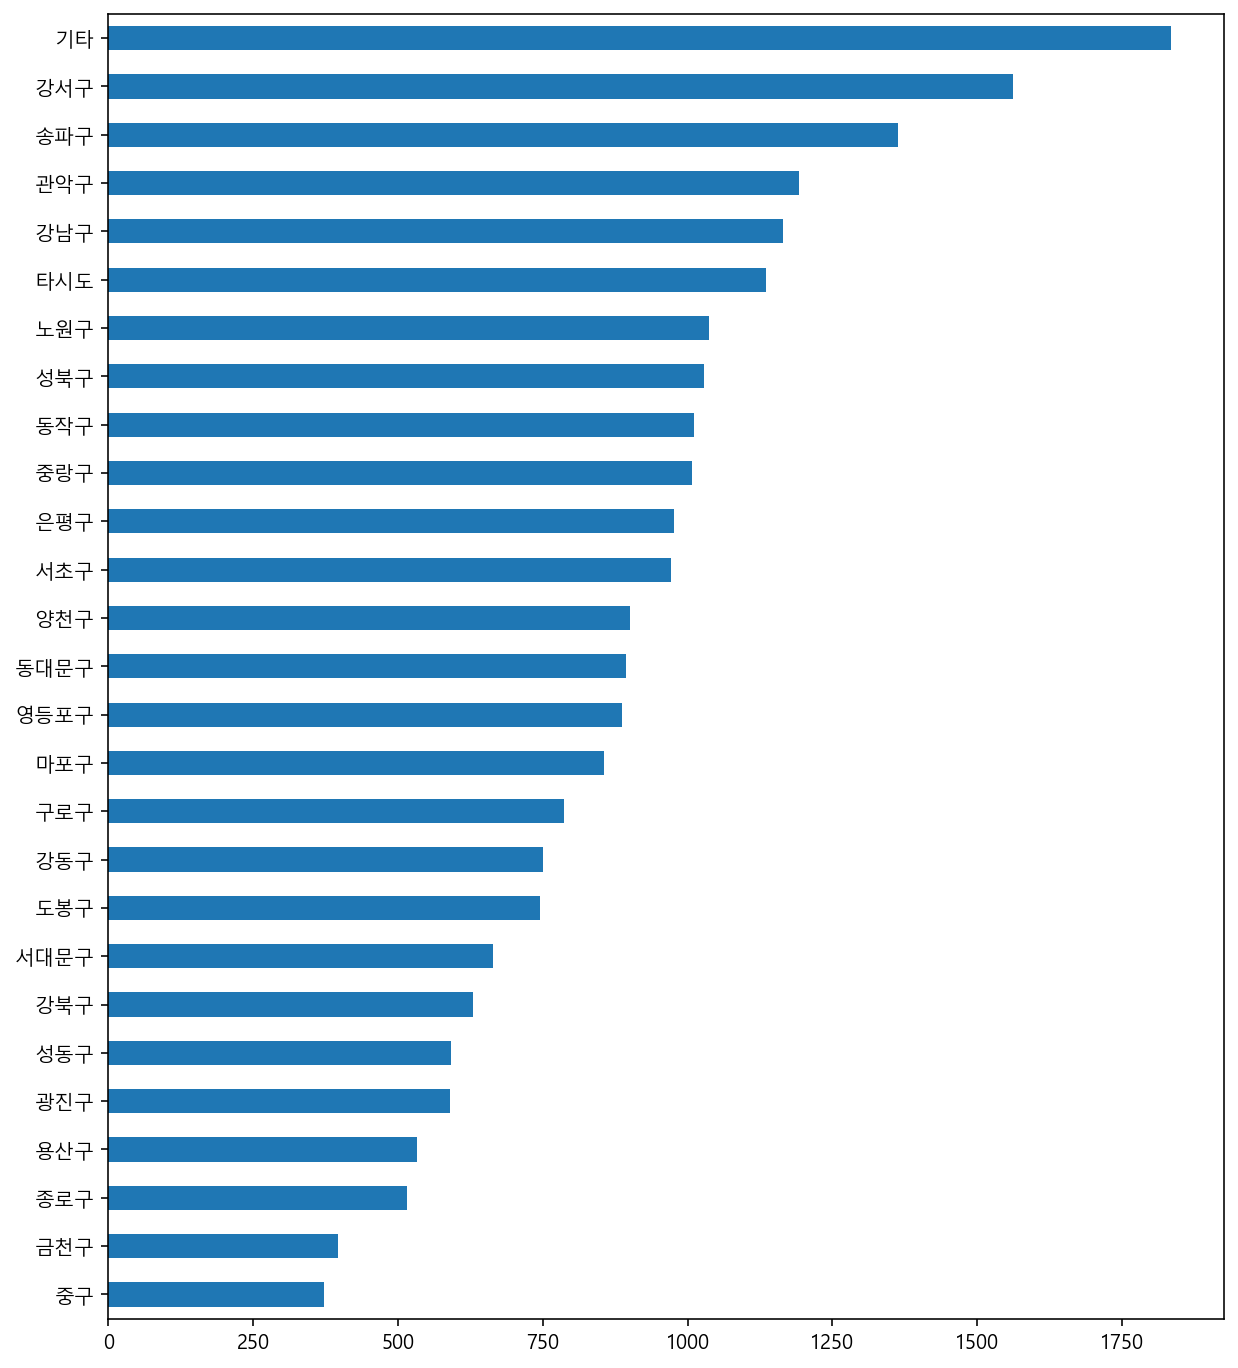

In [52]:
gu_count.sort_values().plot.barh(figsize=(10, 12))

위 결과에서 '기타', '타시도'에 거주하는 확진자(=> 거주지는 '기타' 또는 '타시도', 확진은 '서울'에서 받음)를 제외하고, 서울에만 거주하는 확진자 데이터를 추출합니다.서울에 거주하는 사람은 데이터가 모두 '구'로 끝난다는 점을 사용합니다.

In [53]:
gu_count = gu_count[gu_count.index.str[-1]=='구']
gu_count

강서구     1562
송파구     1364
관악구     1192
강남구     1165
노원구     1037
성북구     1029
동작구     1011
중랑구     1008
은평구      976
서초구      972
양천구      900
동대문구     893
영등포구     887
마포구      855
구로구      787
강동구      750
도봉구      745
서대문구     664
강북구      629
성동구      592
광진구      590
용산구      533
종로구      515
금천구      396
중구       373
Name: 거주지, dtype: int64

시각화 결과, 이전에 '기타' 또는 '타시도' 데이터를 제외할 수 있습니다. <font color='red'>추후 결과를 '서울시 지도'에 시각화하면, 확진자 현황을 파악하기에 쉬울 것 같습니다. </font> -> folium 사용? 

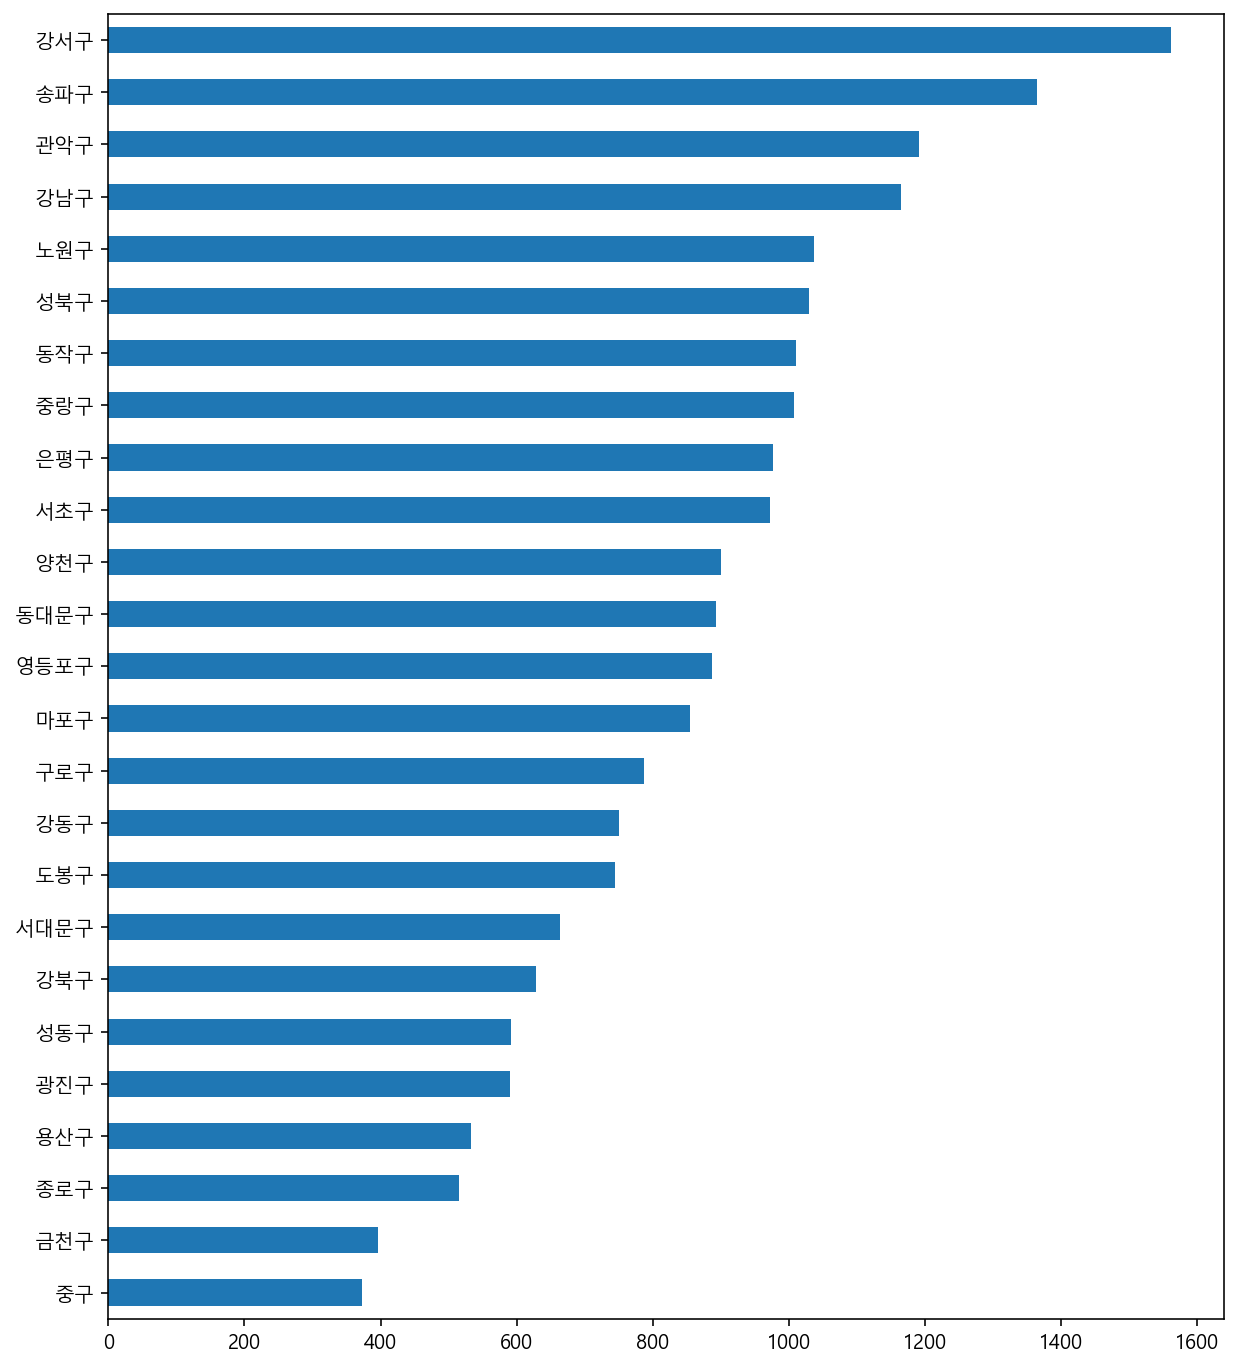

In [54]:
gu_count.sort_values().plot.barh(figsize=(10,12))

서울 '구' 별 확진자수 데이터프레임을 생성합니다.

In [55]:
df_gu_count = gu_count.reset_index().rename(columns={"index": '구', "거주지": '확진수'})
df_gu_count.head()

,구,확진수
0,강서구,1562
1,송파구,1364
2,관악구,1192
3,강남구,1165
4,노원구,1037


다시 전체 거주지 별 확진자를 확인합니다. 거주지가 타시도인데, 서울에서 확진을 받은 환자도 상위권입니다. 즉, 이 환자들이 만약 무증상으로 거주지인 타시도로 이동하면, 지역 감염으로 번질 위험이 컸음을 유추해 볼 수 있습니다.

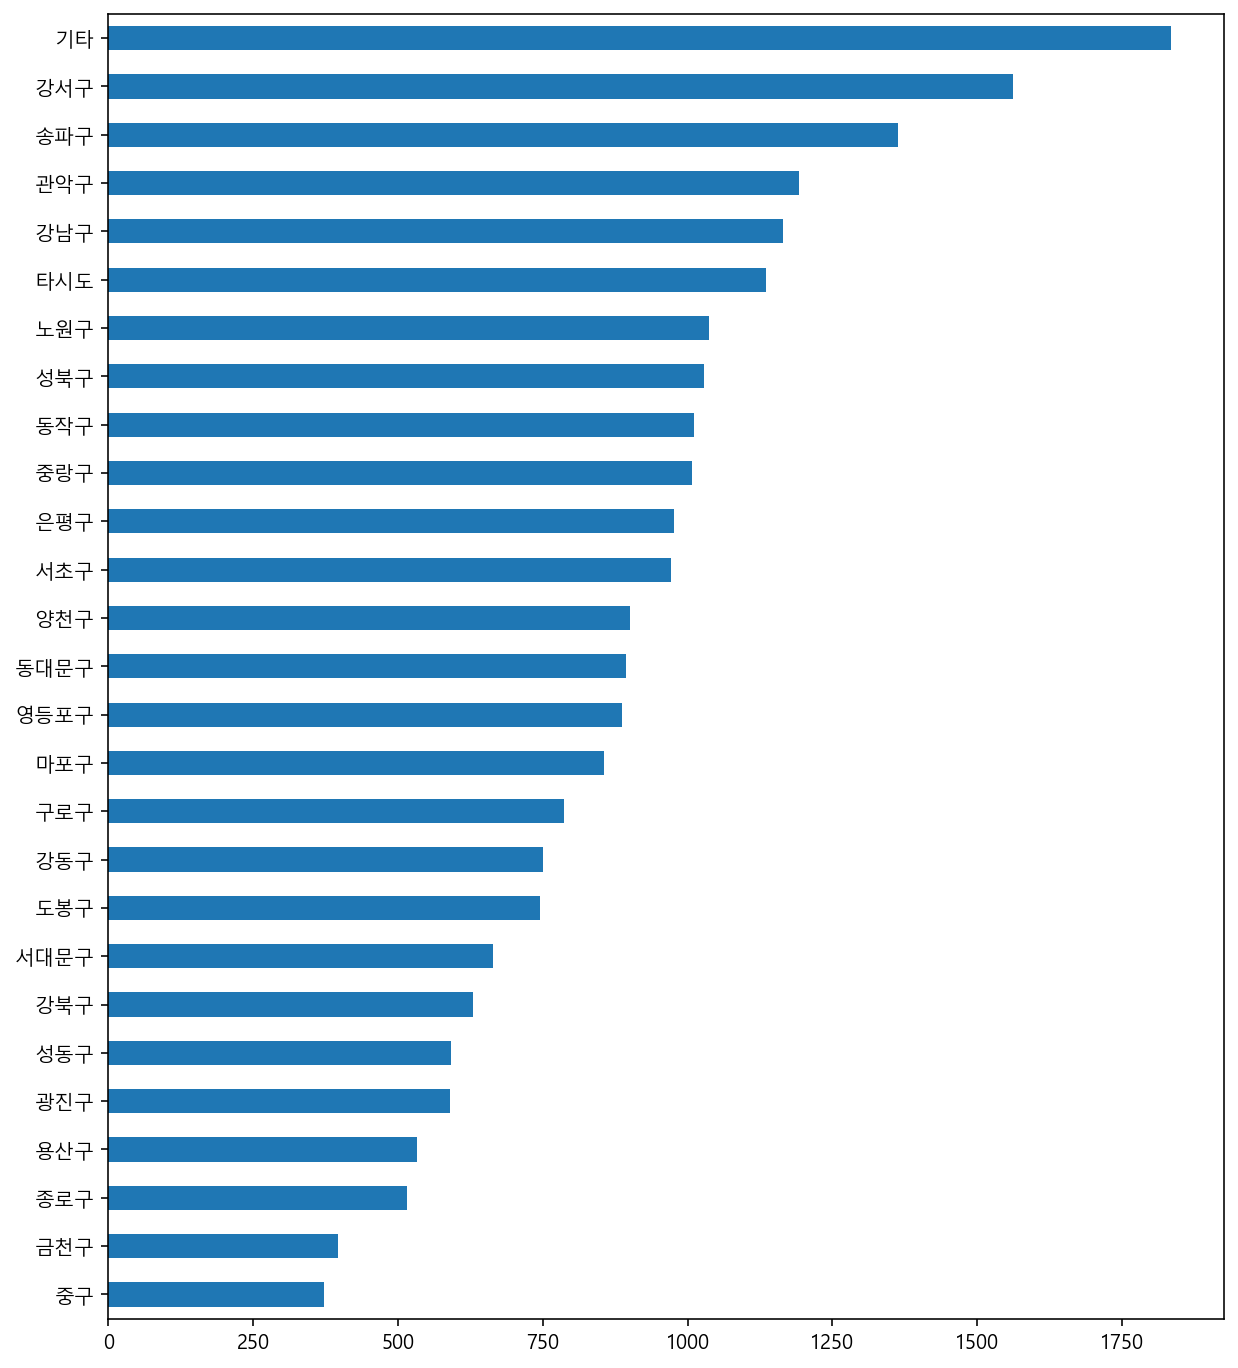

In [56]:
gu_etc_count = df["거주지"].value_counts()
gu_etc_count.sort_values().plot.barh(figsize=(10, 12))

# 접촉력

접촉력 데이터를 확인해서 전처리가 필요한 데이터를 선별합니다.
* 성동구 소재 병원 관련(\\\\\\'21.1월) -> 성동구 소재 병원 관련('21.1월)
* 성동구 소재 병원 관련(\\\\\\\\\\\\\\'21.1월) -> 성동구 소재 병원 관련('21.1월)
* 기타확진자 접촉 -> 기타 확진자 접촉

In [57]:
df["접촉력"].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '광진구 음식점 관련', '해외유입', '중구 소재 복지시설 관련',
       '중구 소재 콜센터4 관련', '타시도 확진자 접촉', "성동구 소재 병원 관련('21.1월)", '병원 및 요양시설',
       '동대문구 소재 고시텔 관련', '성북구 소재 사우나 관련', '강동구 소재 한방병원 관련',
       '성동구 소재 사우나 관련', "성동구 소재 병원 관련(\\'21.1월)", '강남구 소재 직장3 관련',
       '강남구 소재 선교회 교육시설 관련', "성동구 소재 병원 관련(\\\\\\'21.1월)",
       '은평구 소재 병원2 관련', '동작구 소재 병원 관련', '도봉구 소재 교회 관련',
       '서대문구 소재 의료기관/종교시설 관련', '강남구 소재 직장2 관련', '용산구 소재 미군기지 관련',
       '강남구 소재 직장4 관련', "성동구 소재 병원 관련(\\\\\\\\\\\\\\'21.1월)",
       '노원구 소재 요양시설 관련', '동대문구 소재 직장 관련', '성동구 소재 거주시설/요양시설 관련',
       '종로구 소재 직장관련', '종로구 소재 빌딩관련', '영등포구 소재 의료기관2 관련', '송파구 소재 시장 관련',
       '동대문구 소재 현대대중사우나 관련', '대전 IM선교회 관련', '금천구 소재 직장 관련',
       '구로구 소재 직장 관련', '강동구 가족관련', '동대문구 지혜병원 관련', '도봉구 소재 직장 관련',
       '도봉구 소재 어린이집 관련', '종로구 소재 요양시설2 관련', '은평구 소재 병원1 관련',
       '중구 소재 직장2 관련', '동부구치소 관련', '강남구 소재 사우나 관련', '양천구 소재 직장 관련',
       '강북구 소재 아동관련 시설', '강남구 소재 직장1 관련', '상주 BTJ 열방센터 관련', '마포구 소재 종교시설',
       '종로구 소재 

'성동구 소재 병원 관련(\\\\\\'21.1월)' 및 '성동구 소재 병원 관련(\\\\\\\\\\\\\\'21.1월)'를 '성동구 소재 병원 관련('21.1월)'으로 변경합니다.

In [58]:
df.loc[(df["접촉력"].str.contains("성동구 소재 병원 관련"))&(df["접촉력"].str.contains("21.1월")), "접촉력"] = "성동구 소재 병원 관련('21.1월)"

'기타확진자 접촉'을 '기타 확진자 접촉'으로 변경합니다.

In [59]:
df.loc[df["접촉력"].str.contains("기타확진자 접촉"), "접촉력"] = '기타 확진자 접촉'

In [60]:
df["접촉력"].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '광진구 음식점 관련', '해외유입', '중구 소재 복지시설 관련',
       '중구 소재 콜센터4 관련', '타시도 확진자 접촉', "성동구 소재 병원 관련('21.1월)", '병원 및 요양시설',
       '동대문구 소재 고시텔 관련', '성북구 소재 사우나 관련', '강동구 소재 한방병원 관련',
       '성동구 소재 사우나 관련', '강남구 소재 직장3 관련', '강남구 소재 선교회 교육시설 관련',
       '은평구 소재 병원2 관련', '동작구 소재 병원 관련', '도봉구 소재 교회 관련',
       '서대문구 소재 의료기관/종교시설 관련', '강남구 소재 직장2 관련', '용산구 소재 미군기지 관련',
       '강남구 소재 직장4 관련', '노원구 소재 요양시설 관련', '동대문구 소재 직장 관련',
       '성동구 소재 거주시설/요양시설 관련', '종로구 소재 직장관련', '종로구 소재 빌딩관련',
       '영등포구 소재 의료기관2 관련', '송파구 소재 시장 관련', '동대문구 소재 현대대중사우나 관련',
       '대전 IM선교회 관련', '금천구 소재 직장 관련', '구로구 소재 직장 관련', '강동구 가족관련',
       '동대문구 지혜병원 관련', '도봉구 소재 직장 관련', '도봉구 소재 어린이집 관련',
       '종로구 소재 요양시설2 관련', '은평구 소재 병원1 관련', '중구 소재 직장2 관련', '동부구치소 관련',
       '강남구 소재 사우나 관련', '양천구 소재 직장 관련', '강북구 소재 아동관련 시설', '강남구 소재 직장1 관련',
       '상주 BTJ 열방센터 관련', '마포구 소재 종교시설', '종로구 소재 콜센터 관련', '송파구 소재 고시텔 관련',
       '동대문구 소재 대학교 관련', '종로구 소재 사우나 관련', '양천구 소재 요양시설2 관련',
       '동대문구 소재 역사 관련

상위 30개 접촉력 확진수를 시각화합니다.

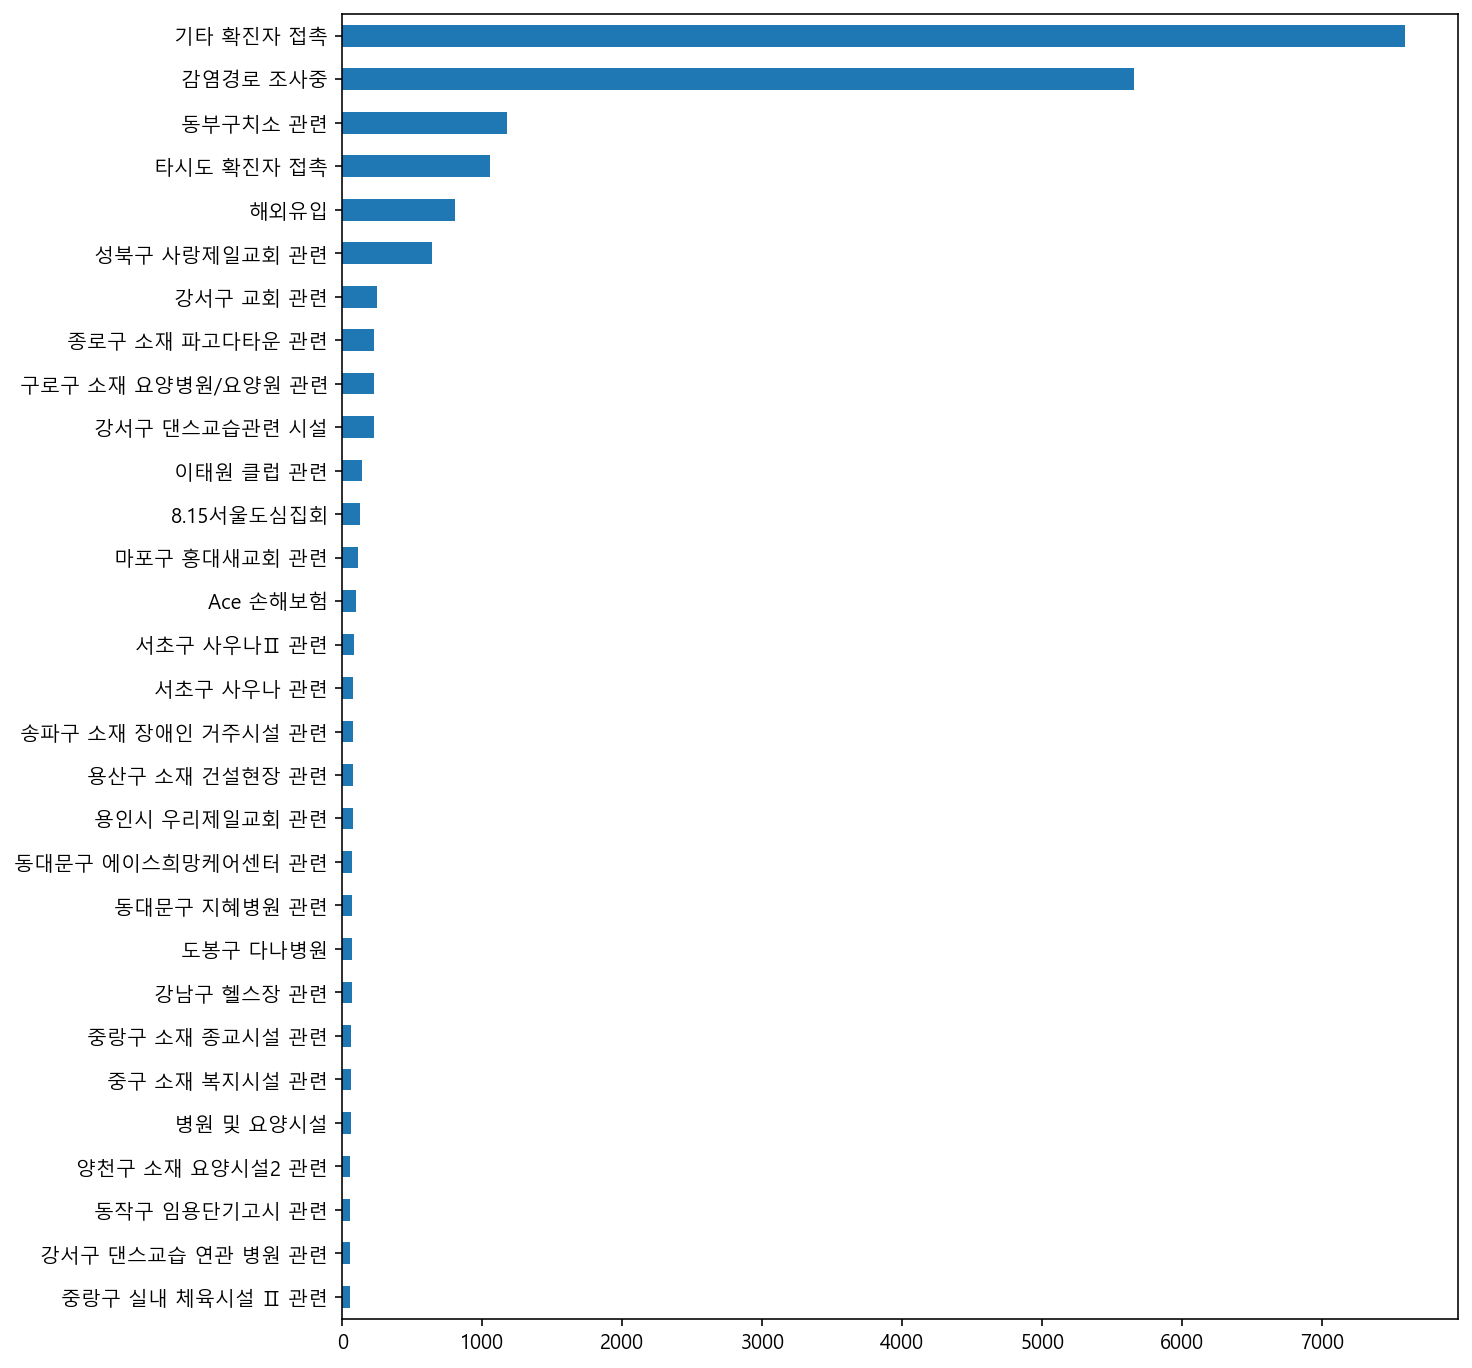

In [61]:
# 접촉력 상위 30개만 시각화 시각화
contact_count_top = df["접촉력"].value_counts().sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10,12))

기타 확진자 접촉이 가장 많은 것으로 보아 n차 감염이 가장 큰 확산세의 원인이 되었음을 알 수 있고, 아직 감염경로를 모르는 확진자도 많은 것으로 보아 역학 조사에 어려움이 있음을 알 수 있습니다. 이 두 가지 문제에 대한 해결책이 필요한 시점이라 생각이 듭니다.

위 결과 중, 상위 15개 접촉력 데이터만 추출해서 데이터를 가져옵니다.

In [62]:
top_contact = contact_count_top.tail(15)
top_contact

서초구 사우나Ⅱ 관련             86
Ace 손해보험                98
마포구 홍대새교회 관련           109
8.15서울도심집회             126
이태원 클럽 관련              139
강서구 댄스교습관련 시설          224
구로구 소재 요양병원/요양원 관련     226
종로구 소재 파고다타운 관련        227
강서구 교회 관련              246
성북구 사랑제일교회 관련          641
해외유입                   805
타시도 확진자 접촉            1054
동부구치소 관련              1175
감염경로 조사중              5655
기타 확진자 접촉             7595
Name: 접촉력, dtype: int64

In [63]:
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주
0,24395,78560,2021-02-01,마포구,-,감염경로 조사중,NaN,2021,2,5
1,24394,78588,2021-02-01,타시도,-,감염경로 조사중,NaN,2021,2,5
2,24393,78822,2021-02-01,강남구,-,기타 확진자 접촉,NaN,2021,2,5
4,24391,78825,2021-02-01,관악구,-,감염경로 조사중,NaN,2021,2,5
5,24390,78824,2021-02-01,관악구,-,기타 확진자 접촉,NaN,2021,2,5
...,...,...,...,...,...,...,...,...,...,...
24387,8,13,2020-02-02,타시도,중국,해외유입,퇴원,2020,2,5
24390,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,5
24391,4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,5
24393,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,5


**1) 2020년 월별 접촉력 확진자 수를 시각화합니다.**

In [64]:
top_group_2020 = top_group[top_group["년"]==2020].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2020.style.background_gradient(cmap="Blues")

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0
Ace 손해보험,0,0,97,1,0,0,0,0,0,0,0,0
감염경로 조사중,0,3,41,16,5,66,49,440,286,120,474,2761
강서구 교회 관련,0,0,0,0,0,0,0,0,0,0,0,245
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42
구로구 소재 요양병원/요양원 관련,0,0,0,0,0,0,0,0,0,0,0,199
기타 확진자 접촉,1,21,21,9,0,14,33,440,304,116,631,3990
동부구치소 관련,0,0,0,0,0,0,0,0,0,0,3,930
마포구 홍대새교회 관련,0,0,0,0,0,0,0,0,0,0,96,13


* 2020년 2월부터 기타 확진자 접촉, 타시도 확진자 접촉으로 인한 확진자가 발생하면서 n차 감염 위험성이 발생했습니다.
* 2020년 3월부터 해외유입과 Ace 손해보험 확진자가 급증하면서, 감염경로를 파악하지 못한 환자도 발생합니다. 또한, n차 감염이 여전히 발생합니다.
* 2020년 4월에는 지역사회 감염이 다소 안정기에 접어들었으나 여전히 해외유입 확진자는 많았습니다.
* 2020년 5월에는 이태원 클럽 확진자가 폭증했습니다. 
* 2020년 6월, 7월에 다시 n차 감염이 확산되었고, 이는 4월과 5월에 해외유입 확진자와 이태원 클럽 관련 확진자의 영향으로 판단됩니다.
* 2020년 8월에는 8.15서울도심집회 확진자와 성북구 사랑제일교회 확진자가 폭증합니다. 이에 따라 n차 감염과 감염경로가 불투명한 확진자 역시도 폭등합니다.
* 2020년 9월, 10월까지 n차 감염이 심하게 확산되는 것을 볼 수 있습니다.
* 2020년 11월에는 강서구 댄스교습관련 확진자, 마포구 홍대새교회 확진자, 서초구 사우나 관련 확진자가 발생하면서 아직 n차 감염이 여전한 상황이었는데, 확산이 더 심해지게 되었습니다.
* 2020년 12월에는 동부구치소, 종로구 소재 파고다타운, 구로구 소재 요양병원, 강서구 교회에서 확진자가 발생하면서 n차 감염 역시도 폭증하는 것을 볼 수 있습니다.

**2) 2021년 월별 접촉력 확진자 수를 시각화합니다.**

In [65]:
top_group_2021 = top_group[top_group["년"]==2021].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2021.style.background_gradient(cmap="Greens")

월,1,2
접촉력,,
감염경로 조사중,1360,34
강서구 교회 관련,1,0
구로구 소재 요양병원/요양원 관련,27,0
기타 확진자 접촉,1977,38
동부구치소 관련,242,0
타시도 확진자 접촉,210,8
해외유입,149,7


* 2021년 1월에는 2020년 12월의 n차 감염 여파가 여전히 성행하고 있는 것을 알 수 있고, 동부구치소 관련 확진자와 요양병원 확진자도 발생하고 있음을 알 수 있습니다.

## 감염경로 조사중
감염경로가 불투명한 확진자 정보를 분석한 결과, 2020년 8월에 감염경로 불투명 환자가 증가 후에 감소세를 보이다가 다시 11월에 증가하고, 12월에는 폭증하는 것을 확인할 수 있습니다. 이를 통해 확진자수가 많을수록 감염경로가 불명한 환자 역시도 증가하는 것을 알 수 있습니다. <font color='red'>-> 이에 대응할 수 있는 역학 조사관 인력이 더 많이 필요하다는 것을 알 수 있습니다.</font>

In [66]:
df_unknown = df[df["접촉력"]=='감염경로 조사중']
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주
0,24395,78560,2021-02-01,마포구,-,감염경로 조사중,NaN,2021,2,5
1,24394,78588,2021-02-01,타시도,-,감염경로 조사중,NaN,2021,2,5
4,24391,78825,2021-02-01,관악구,-,감염경로 조사중,NaN,2021,2,5
6,24389,78798,2021-02-01,영등포구,-,감염경로 조사중,NaN,2021,2,5
7,24388,78802,2021-02-01,노원구,-,감염경로 조사중,NaN,2021,2,5


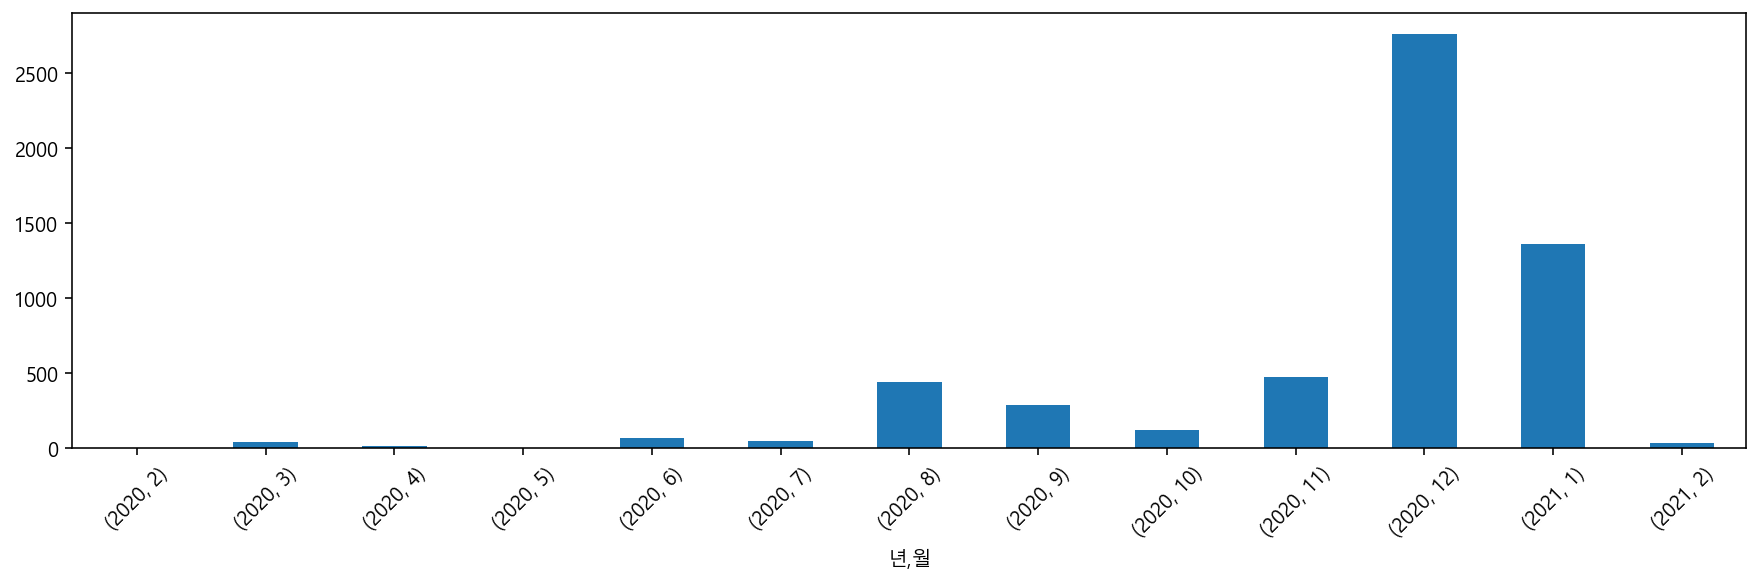

In [67]:
unknown_weekly_case = df_unknown.groupby(["년", "월"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15,4), rot=45)

전체 확진자 중에 감염 경로가 불분명한 확진자를 비교하기 위해 전체 확진수 데이터프레임과 감염 경로가 불분명한 확진수 데이터프레임을 각각 생성한 후, 병합(merge)을 수행합니다. 상세히 확인하기 위해 ("년", "주") 별로 데이터프레임을 생성합니다.

In [68]:
# 1) 전체 확진수
all_weekly_case = df[["년", "주"]].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case

전체확진수
년    주        
2020 52   2693
     51   2654
     50   1975
     53   1633
     49   1627
2021 1    1456
2020 48   1182
2021 2    1002
2020 35    921
     34    912
2021 3     844
2020 47    820
2021 4     807
     53    769
2020 36    459
     46    432
     33    394
     37    341
     45    291
     38    280
     44    250
     39    237
     41    170
     40    164
     42    139
     23    134
     14    129
2021 5     128
2020 43    127
     24    125
     11    124
     25    105
     13    105
     30     97
     22     88
     26     78
     32     76
     12     76
     27     67
     9      61
     28     57
     19     52
     29     48
     20     47
     15     47
     21     39
     10     38
     31     38
     8      17
     16     15
     18      8
     5       7
     6       4
     17      3
     7       2
     4       1

In [69]:
# 2) 경로가 불분명한 확진수
unknown_weekly_case = df_unknown[["년", "주"]].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case

불명확진수
년    주        
2020 52    843
     51    806
     50    507
2021 1     403
2020 53    361
     49    278
2021 2     277
     3     233
     53    231
2020 35    222
2021 4     216
2020 48    216
     34    163
     47    131
     36     94
     37     77
     38     72
     46     51
     39     42
     45     41
     44     36
     41     35
2021 5      34
2020 40     30
     33     23
     42     22
     24     19
     12     18
     43     16
     23     16
     25     15
     32     14
     14     14
     30     13
     27     13
     28     11
     26     11
     29      9
     31      9
     13      8
     11      8
     22      4
     9       4
     16      3
     10      3
     15      2
     20      1

In [70]:
# 1)과 2)를 한 개 데이터프레임으로 merge!
# => how='inner': 시각화할때, all_weekly_case와 unknown_weekly_case에 모두 존재하는 데이터만 고려하기 위함!
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case

전체확진수  불명확진수
년    주               
2020 9      61      4
     10     38      3
     11    124      8
     12     76     18
     13    105      8
     14    129     14
     15     47      2
     16     15      3
     20     47      1
     22     88      4
     23    134     16
     24    125     19
     25    105     15
     26     78     11
     27     67     13
     28     57     11
     29     48      9
     30     97     13
     31     38      9
     32     76     14
     33    394     23
     34    912    163
     35    921    222
     36    459     94
     37    341     77
     38    280     72
     39    237     42
     40    164     30
     41    170     35
     42    139     22
     43    127     16
     44    250     36
     45    291     41
     46    432     51
     47    820    131
     48   1182    216
     49   1627    278
     50   1975    507
     51   2654    806
     52   2693    843
     53   1633    361
2021 1    1456    403
     2    1002    277
     3     844    233
     4     807    216
     5     128     34
     53    769    231

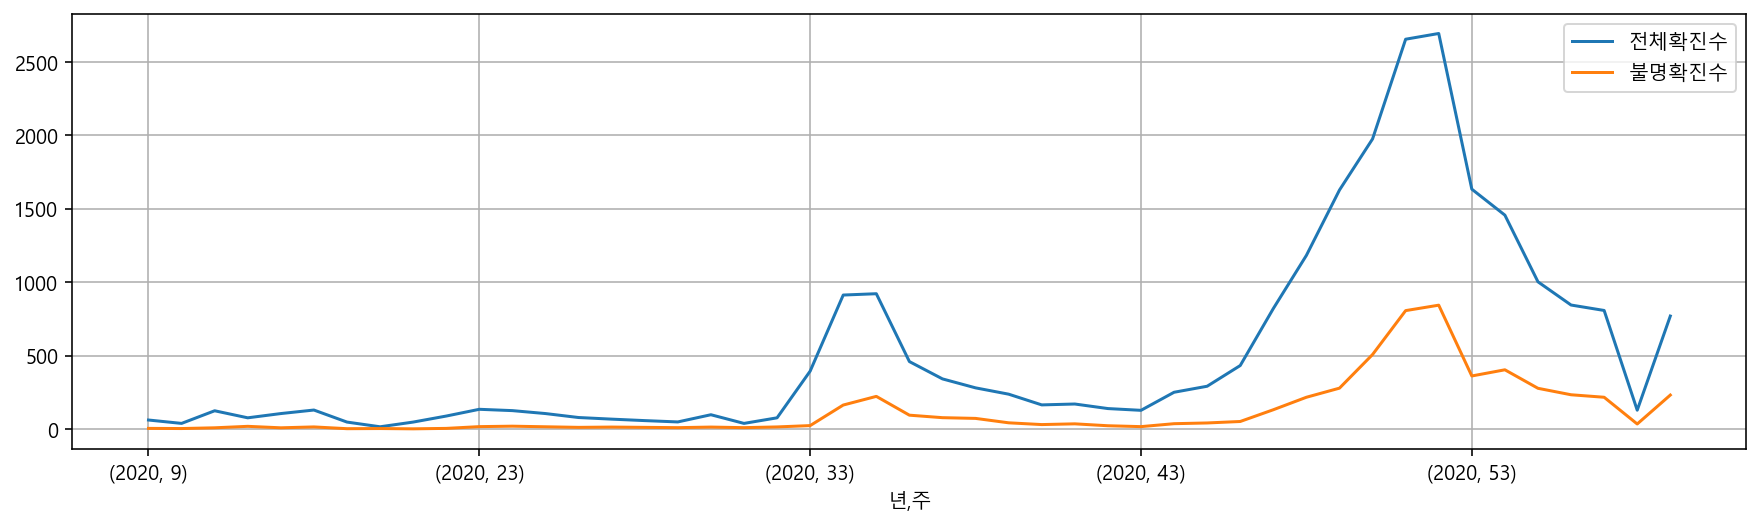

In [71]:
unknown_case.plot(figsize=(15,4))
plt.grid(True)

대체적으로 전체 확진자수가 증가할 때, 감염 경로가 불분명한 확진자도 증가하는 것을 알 수 있습니다. 이에 대한 원인으로 증가하는 환자를 한 명씩 역학 조사해야 하는 인력 부족이 원인이 될 수 있습니다. 또한, 올바른 이동 동선을 제공하지 않는 경우에도 이와 같은 현상이 발생할 수 있습니다.

마지막으로, 전체 확진수 중에 불명 확진수 비율을 시각화해봤습니다.

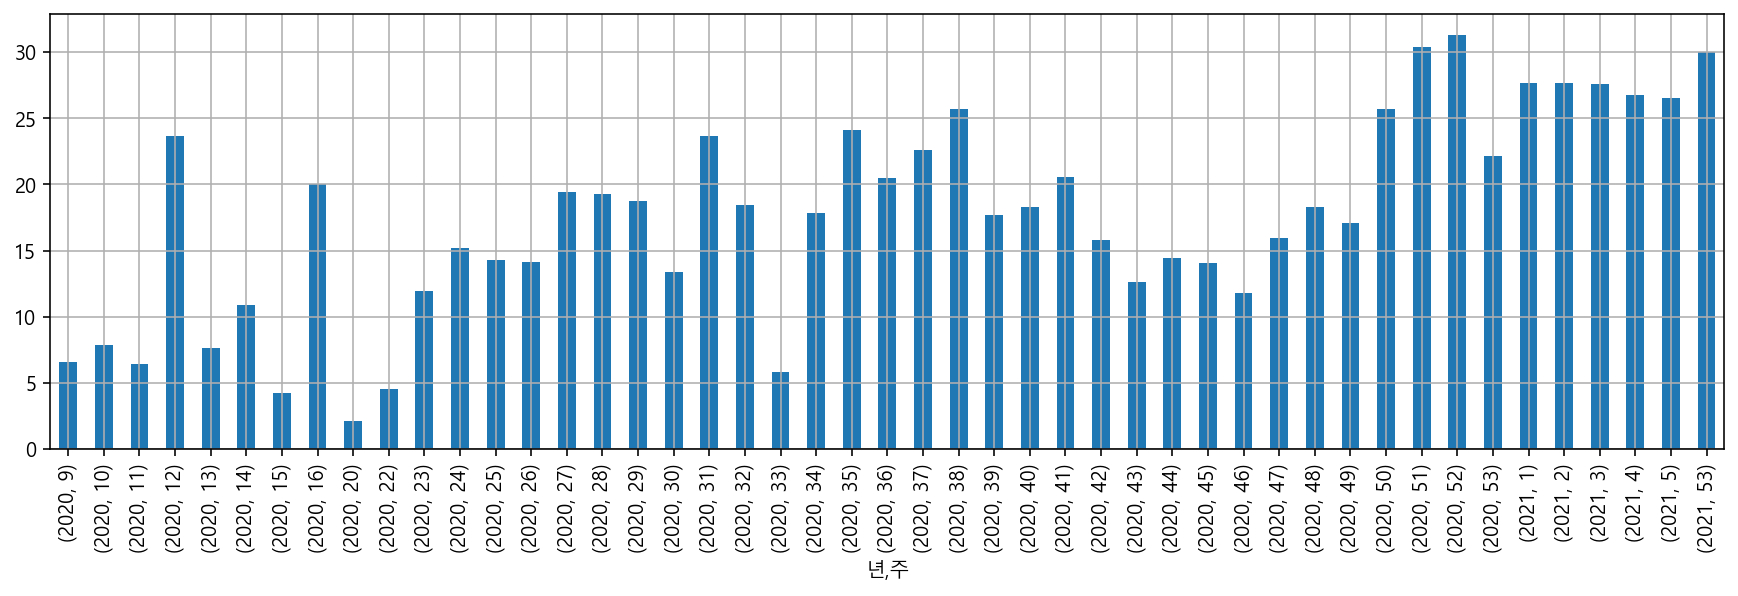

In [72]:
# 전체확진수 중에 불명확인수 비율 시각화
unknown_case["확인중비율"] = (unknown_case["불명확진수"]/unknown_case["전체확진수"])*100
unknown_case["확인중비율"].plot.bar(figsize=(15,4))
plt.grid(True)

2020년 50주차, 즉 12월이 가장 감염 경로가 불확실한 환자 비율이 크다고 볼 수 있습니다.

# 퇴원, 사망여부
데이터 수집 시점(2021-02-02)에서의 퇴원 및 사망 비율을 분석합니다.

In [73]:
df["퇴원현황"].unique()

array([nan, '사망', '퇴원'], dtype=object)

In [74]:
df["퇴원"] = df["퇴원현황"].str.contains("퇴원", na=False) # na=False: 퇴원현황이 Nan인 경우에 False로 반환하도록 설정
df["사망"] = df["퇴원현황"].str.contains("사망", na=False)

In [75]:
df["퇴원"].value_counts(normalize=True)

True     0.838328
False    0.161672
Name: 퇴원, dtype: float64

In [76]:
df["사망"].value_counts(normalize=True)

False    0.986637
True     0.013363
Name: 사망, dtype: float64

데이터 수집 시점(2021-02-02)의 퇴원 확률은 약 84%, 사망 확률은 약 1%임을 알 수 있습니다. 대체로 퇴원이 순조로움을 알 수 있으며, 사망 확률도 매우 낮은 것을 알 수 있습니다.

이제 데이터 수집 시점 기준으로 서울에 거주하는 환자 중에 가장 오래 입원한 확진자를 알아 보았습니다.

In [77]:
df_seoul = df[df["거주지"].isin(gu_count.index)]
df_seoul

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망
0,24395,78560,2021-02-01,마포구,-,감염경로 조사중,NaN,2021,2,5,False,False
2,24393,78822,2021-02-01,강남구,-,기타 확진자 접촉,NaN,2021,2,5,False,False
3,24392,78826,2021-02-01,관악구,-,광진구 음식점 관련,NaN,2021,2,5,False,False
4,24391,78825,2021-02-01,관악구,-,감염경로 조사중,NaN,2021,2,5,False,False
5,24390,78824,2021-02-01,관악구,-,기타 확진자 접촉,NaN,2021,2,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
24390,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,5,True,False
24391,4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,5,True,False
24392,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,5,True,False
24393,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,5,True,False


In [78]:
# 퇴원 == False & 사망 == False 
df_seoul[(df_seoul["퇴원"]==False) & (df_seoul["사망"]==False)].tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망
17892,6503,27936,2020-11-11,용산구,-,감염경로 조사중,NaN,2020,11,46,False,False
18007,6388,27596,2020-11-09,강서구,-,기타 확진자 접촉,NaN,2020,11,46,False,False
18500,5895,26209,2020-10-28,중랑구,-,기타 확진자 접촉\r\n[경기도 SRC재활병원],NaN,2020,10,44,False,False
18971,5424,24316,2020-10-06,중랑구,-,감염경로 조사중,NaN,2020,10,41,False,False
19641,4754,22411,2020-09-15,마포구,-,강남구 소재 대우디오빌플러스,NaN,2020,9,38,False,False


강남구 소재 대우디오빌플러스에서 감염된 서울 마포구 거주자 #4754번 환자가 데이터 수집 시점(2021-02-01) 기준으로 4개월 이상 가장 오래 입원한 상태

# 여행력
전체 확진수와 여행력이 있는 확진수의 관계를 분석합니다.

In [79]:
df["여행력"].unique()

array(['-', '오스트리아', '스페인', '러시아', '미국', 'UAE', '이라크', '덴마크', '우즈베키스탄',
       '콩고민주공화국', '일본', '프랑스', '독일', '아이티공화국', '캐나다', '터키', '탄자니아', '영국',
       '인도네시아', '파키스탄', '아랍에미리트', '이집트', '스리랑카', '폴란드', '에티오피아', '에콰도르',
       '캄보디아', '인도', '싱가포르', '르완다', '나이지리아', '미얀마', '벨기에', '콩고', '모로코',
       '네팔', '우크라이나', '헝가리', '스웨덴', '브라질', '방글라데시', '멕시코', '시리아', '리투아니아',
       '두바이', '중국', '호주', '필리핀', '몰타', '남아공', '알제리', '가나', '알바니아', '핀란드',
       '네덜란드', '아르헨티나', '가봉', '사우디아라비아', '이탈리아', '쿠웨이트', '크로아티아', '28238',
       '케냐', '수단', '루마니아', '튀니지', '에디오피아', '키르기스스탄', '이란', '체코', '요르단',
       '우간다', '카타르', '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄', '21263', '베트남',
       '홍콩', '모로코, 터키', '미국, 멕시코', '페루', '아일랜드', '아프리카',
       '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '오세아니아', '호주, 인도네시아', '포르투갈', '유럽',
       '미국, 캐나다, 멕시코', '미국, 브라질', '태국', '아시아', '아르헨티나, 볼리비아, 브라질',
       '말레이시아, 인도네시아', '브라질,아르헨티아,칠레,볼리비아', '프랑스, 독일', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '오스트리아, 모로코, 프랑스',
       '

데이터 전처리를 위해 새로운 칼럼을 생성하여 여행력 데이터를 저장합니다. 여행력이 없는 확진자의 경우, '-' 기호를 Nan으로 변경합니다. **(데이터를 전처리 할 때는 새로운 칼럼을 생성해서 전처리한 결과를 저장하는 것이 좋습니다.)**

In [80]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].replace('-', np.nan) 
df["해외"].nunique() # 결측치를 제외한(default dropna=True) unique한 데이터 개수

103

In [81]:
df["해외"].value_counts().head(10)

미국        278
영국         58
필리핀        29
러시아        27
일본         23
프랑스        22
인도네시아      21
우즈베키스탄     19
인도         17
독일         14
Name: 해외, dtype: int64

미국 여행력이 있는 확진자가 가장 큰 차이로 많으며, 영국, 필리핀, 러시아 여행력을 가진 확진자가 많습니다.

## 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [82]:
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망,해외
15,24380,78759,2021-02-01,용산구,오스트리아,해외유입,NaN,2021,2,5,False,False,오스트리아
51,24344,78698,2021-02-01,성북구,스페인,해외유입,NaN,2021,2,5,False,False,스페인
59,24336,78665,2021-02-01,성북구,러시아,해외유입,NaN,2021,2,5,False,False,러시아
60,24335,78664,2021-02-01,성북구,러시아,해외유입,NaN,2021,2,5,False,False,러시아
70,24325,78683,2021-02-01,동작구,미국,해외유입,NaN,2021,2,5,False,False,미국


In [83]:
df_oversea["해외"].unique()

array(['오스트리아', '스페인', '러시아', '미국', 'UAE', '이라크', '덴마크', '우즈베키스탄',
       '콩고민주공화국', '일본', '프랑스', '독일', '아이티공화국', '캐나다', '터키', '탄자니아', '영국',
       '인도네시아', '파키스탄', '아랍에미리트', '이집트', '스리랑카', '폴란드', '에티오피아', '에콰도르',
       '캄보디아', '인도', '싱가포르', '르완다', '나이지리아', '미얀마', '벨기에', '콩고', '모로코',
       '네팔', '우크라이나', '헝가리', '스웨덴', '브라질', '방글라데시', '멕시코', '시리아', '리투아니아',
       '두바이', '중국', '호주', '필리핀', '몰타', '남아공', '알제리', '가나', '알바니아', '핀란드',
       '네덜란드', '아르헨티나', '가봉', '사우디아라비아', '이탈리아', '쿠웨이트', '크로아티아', '28238',
       '케냐', '수단', '루마니아', '튀니지', '에디오피아', '키르기스스탄', '이란', '체코', '요르단',
       '우간다', '카타르', '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄', '21263', '베트남',
       '홍콩', '모로코, 터키', '미국, 멕시코', '페루', '아일랜드', '아프리카',
       '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '오세아니아', '호주, 인도네시아', '포르투갈', '유럽',
       '미국, 캐나다, 멕시코', '미국, 브라질', '태국', '아시아', '아르헨티나, 볼리비아, 브라질',
       '말레이시아, 인도네시아', '브라질,아르헨티아,칠레,볼리비아', '프랑스, 독일', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '오스트리아, 모로코, 프랑스',
       '독일, 프

해외 칼럼에 '28238', '21263'이라는 잘못된 데이터가 들어가 있어서 확인한 결과, 환자 칼럼 데이터임을 확인할 수 있었습니다. 해당 환자의 경우, 여행력을 유추하기 어렵다고 판단하여 제거했습니다.

In [84]:
df_oversea[df_oversea["해외"]=='28238']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망,해외
17794,6601,28238,2020-11-13,동대문구,28238,동대문구 에이스희망케어센터 관련,퇴원,2020,11,46,True,False,28238


In [85]:
df_oversea[df_oversea["해외"]=='21263']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망,해외
20829,3566,21263,2020-08-28,노원구,21263,기타 확진자 접촉,퇴원,2020,8,35,True,False,21263


In [86]:
df_oversea.drop(df_oversea[df_oversea["해외"]=='28238'].index, inplace=True)
df_oversea.drop(df_oversea[df_oversea["해외"]=='21263'].index, inplace=True)
df_oversea["해외"].unique()

array(['오스트리아', '스페인', '러시아', '미국', 'UAE', '이라크', '덴마크', '우즈베키스탄',
       '콩고민주공화국', '일본', '프랑스', '독일', '아이티공화국', '캐나다', '터키', '탄자니아', '영국',
       '인도네시아', '파키스탄', '아랍에미리트', '이집트', '스리랑카', '폴란드', '에티오피아', '에콰도르',
       '캄보디아', '인도', '싱가포르', '르완다', '나이지리아', '미얀마', '벨기에', '콩고', '모로코',
       '네팔', '우크라이나', '헝가리', '스웨덴', '브라질', '방글라데시', '멕시코', '시리아', '리투아니아',
       '두바이', '중국', '호주', '필리핀', '몰타', '남아공', '알제리', '가나', '알바니아', '핀란드',
       '네덜란드', '아르헨티나', '가봉', '사우디아라비아', '이탈리아', '쿠웨이트', '크로아티아', '케냐',
       '수단', '루마니아', '튀니지', '에디오피아', '키르기스스탄', '이란', '체코', '요르단', '우간다',
       '카타르', '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄', '베트남', '홍콩',
       '모로코, 터키', '미국, 멕시코', '페루', '아일랜드', '아프리카',
       '프랑스, 스페인, 이탈리아, 독일, 네덜란드', '오세아니아', '호주, 인도네시아', '포르투갈', '유럽',
       '미국, 캐나다, 멕시코', '미국, 브라질', '태국', '아시아', '아르헨티나, 볼리비아, 브라질',
       '말레이시아, 인도네시아', '브라질,아르헨티아,칠레,볼리비아', '프랑스, 독일', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '오스트리아, 모로코, 프랑스',
       '독일, 프랑스', '싱가폴'], dtype

## 텍스트 데이터 다루기 
일부 해외 칼럼 데이터를 '유럽', '남미', '중국', 'UAE', '필리핀'으로 통일합니다.

* https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

유럽에 속하는 나라를 '|'로 구분합니다. 추후 .str.contains()를 통해 국가명을 '유럽'으로 통일할 때, 사용하기 위함입니다.

In [87]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
europe = europe.replace(",", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드|터키|아일랜드'

In [88]:
df_oversea[df_oversea["해외"].str.contains(europe)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망,해외
15,24380,78759,2021-02-01,용산구,오스트리아,해외유입,NaN,2021,2,5,False,False,오스트리아
51,24344,78698,2021-02-01,성북구,스페인,해외유입,NaN,2021,2,5,False,False,스페인
670,23725,76622,2021-01-27,용산구,프랑스,해외유입,NaN,2021,1,4,False,False,프랑스
738,23657,76042,2021-01-26,송파구,독일,해외유입,NaN,2021,1,4,False,False,독일
801,23594,76039,2021-01-26,용산구,독일,해외유입,NaN,2021,1,4,False,False,독일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24179,216,8063,2020-03-11,성북구,"독일, 프랑스",해외유입,퇴원,2020,3,11,True,False,"독일, 프랑스"
24280,115,6959,2020-03-07,은평구,프랑스,해외유입,퇴원,2020,3,10,True,False,프랑스
24293,102,5695,2020-03-04,동대문구,이탈리아,해외유입,퇴원,2020,3,10,True,False,이탈리아
24310,85,3681,2020-02-29,강남구,이탈리아,해외유입,퇴원,2020,2,9,True,False,이탈리아


남미에 속하는 나라를 '|'로 구분합니다. 추후 .str.contains()를 통해 국가명을 '남미'로 통일할 때, 사용하기 위함입니다.

In [89]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질,아르헨티아,칠레,볼리비아,멕시코,페루"
south_america = south_america.replace(",", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

국가명을 '유럽', '남미', 'UAE', '필리핀', '미국'으로 통일합니다. <font color='red'>다만, '유럽'과 '남미'에 속하는 나라에 여행력을 가진 경우에는 어떻게 처리하는게 맞는지 고민이 필요할 것 같습니다.</font>

In [90]:
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
df_oversea.loc[df_oversea["해외"].str.contains('아랍에미리트'), "해외"] = 'UAE'
df_oversea.loc[df_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
df_oversea.loc[df_oversea["해외"].str.contains('미국'), "해외"] = '미국'
df_oversea["해외"]

15        유럽
51        유럽
59       러시아
60       러시아
70        미국
        ... 
24386    싱가폴
24387     중국
24391     중국
24393     중국
24394     중국
Name: 해외, Length: 800, dtype: object

확진일자 별 여행력을 가진 확진자수 간의 관계를 분석합니다.

In [91]:
df_oversea.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망,해외
15,24380,78759,2021-02-01,용산구,오스트리아,해외유입,NaN,2021,2,5,False,False,유럽
51,24344,78698,2021-02-01,성북구,스페인,해외유입,NaN,2021,2,5,False,False,유럽
59,24336,78665,2021-02-01,성북구,러시아,해외유입,NaN,2021,2,5,False,False,러시아
60,24335,78664,2021-02-01,성북구,러시아,해외유입,NaN,2021,2,5,False,False,러시아
70,24325,78683,2021-02-01,동작구,미국,해외유입,NaN,2021,2,5,False,False,미국


In [92]:
day_oversea = df_oversea.groupby(["확진일", "해외"])["연번"].count()
day_oversea

확진일         해외 
2020-01-24  중국     1
2020-01-30  중국     2
2020-02-02  중국     1
2020-02-05  싱가폴    1
2020-02-06  중국     2
                  ..
2021-01-31  이라크    1
2021-02-01  UAE    1
            러시아    3
            미국     1
            유럽     2
Name: 연번, Length: 543, dtype: int64

확진일자 및 해외 칼럼(여행력 칼럼 데이터 전처리) 별 누적 확진자수를 계산합니다. day_oversea가 MultiIndex dataframe이기 때문에 level=[1]로 지정하면, 가장 바깥쪽 최상위 인덱스("확진일")의 하위 인덱스("해외")를 기준으로 삼을 수 있습니다. level=[-1]로 지정해도 동일한 결과를 출력합니다.

In [93]:
day_oversea_cumsum = day_oversea.groupby(level=[1]).cumsum()
day_oversea_cumsum

확진일         해외 
2020-01-24  중국       1
2020-01-30  중국       3
2020-02-02  중국       4
2020-02-05  싱가폴      1
2020-02-06  중국       6
                  ... 
2021-01-31  이라크     12
2021-02-01  UAE     12
            러시아     27
            미국     278
            유럽     162
Name: 연번, Length: 543, dtype: int64

데이터프레임으로 변환합니다.

In [94]:
df_day_oversea_cumsum = day_oversea_cumsum.reset_index()
df_day_oversea_cumsum = df_day_oversea_cumsum.rename(columns={"연번": '누적확진수'})
df_day_oversea_cumsum.head()

,확진일,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가폴,1
4,2020-02-06,중국,6


해외 칼럼의 각 국가별 누적확진자 발생 빈도를 시각화하면, 미국, 유럽이 가장 큰 차이로 많고, 필리핀, 일본이 뒤를 따릅니다. 이를 통해 해외유입 확진자는 미국, 유럽이 가장 많음을 알 수 있습니다. 

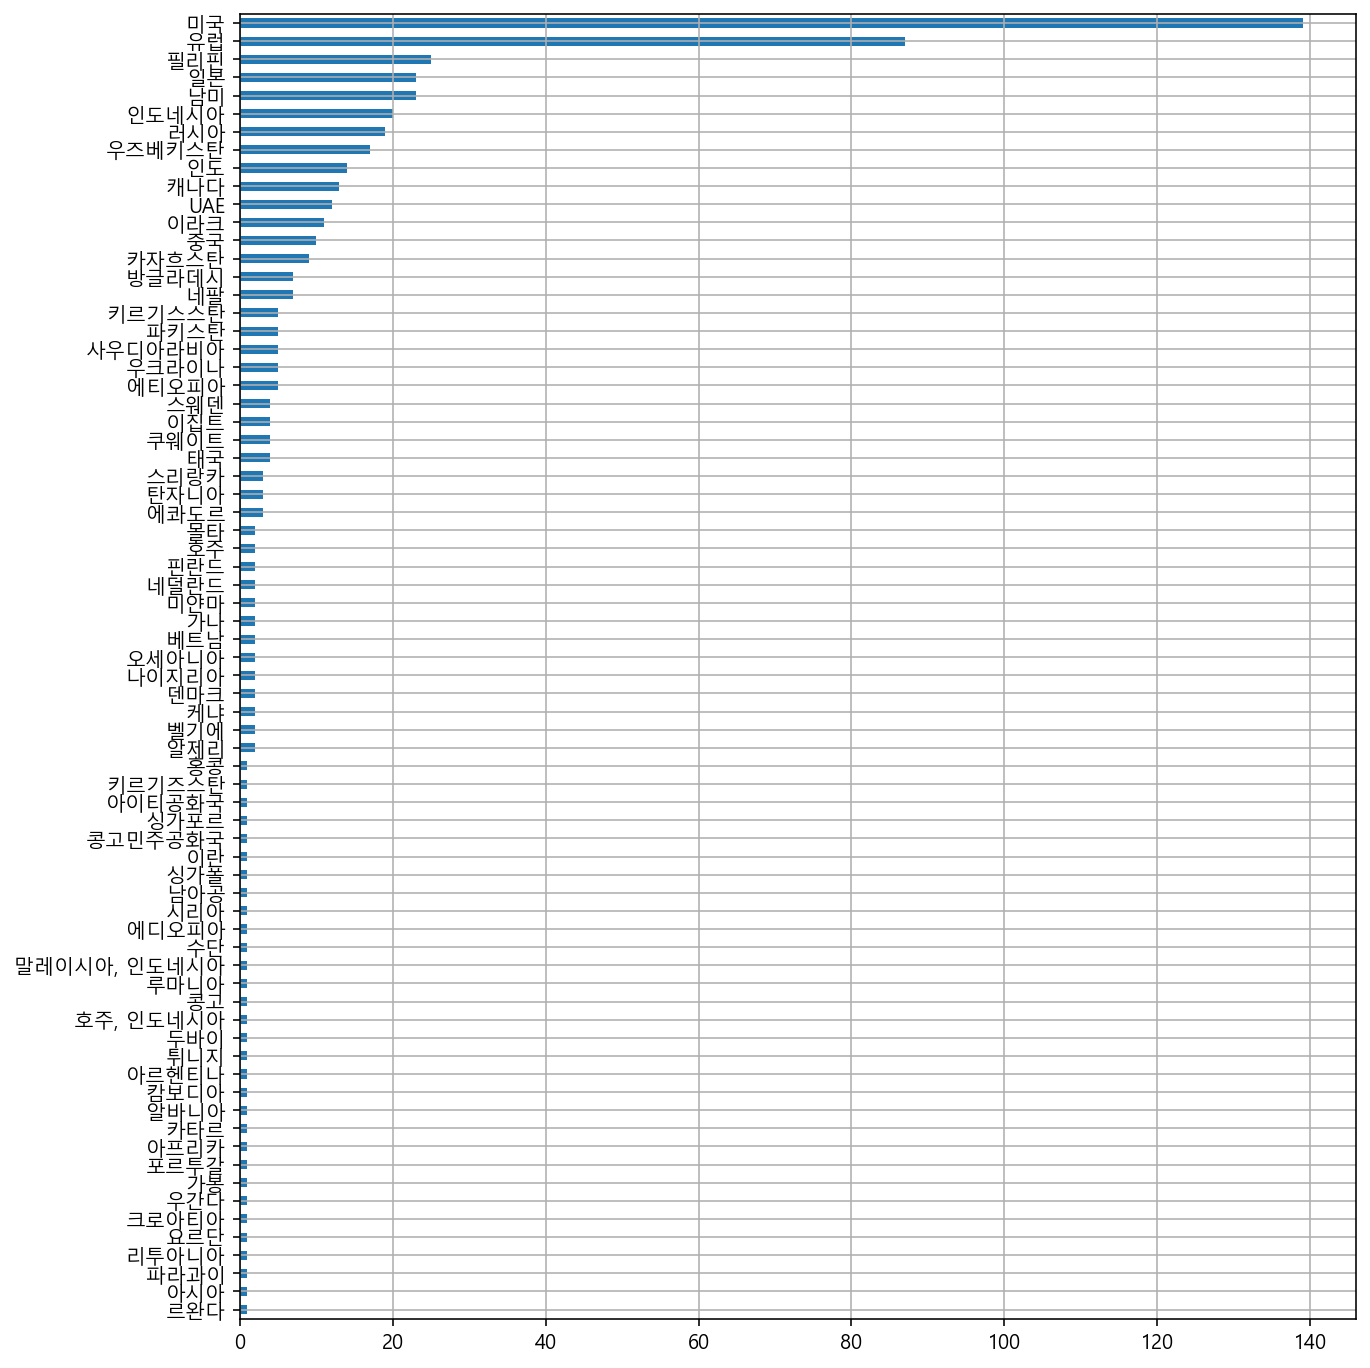

In [95]:
oversea_count = df_day_oversea_cumsum["해외"].value_counts()
oversea_count.sort_values().plot.barh(figsize=(10,12))
plt.grid(True)

여행력을 가진 누적 확진자수가 가장 많은 상위 10개 국가를 확진일 별로 pivot table을 생성합니다. 여행력을 가진 누적 확진자수가 가장 많은 상위 10개 국가는 미국, 유럽, 남미, 필리핀 순입니다.

In [96]:
df_day_oversea_top_10 = df_day_oversea_cumsum.groupby("해외")["누적확진수"].max().sort_values(ascending=False)[:10]
df_day_oversea_top_10 = df_day_oversea_top_10.index
df_day_oversea_top_10

Index(['미국', '유럽', '남미', '필리핀', '러시아', '일본', '인도네시아', '우즈베키스탄', '인도', '캐나다'], dtype='object', name='해외')

In [97]:
df_day_oversea_cumsum = df_day_oversea_cumsum[df_day_oversea_cumsum["해외"].isin(df_day_oversea_top_10)]
df_day_oversea_cumsum = df_day_oversea_cumsum.set_index("확진일")
df_day_oversea_cumsum

,해외,누적확진수
확진일,,
2020-02-27,유럽,1
2020-02-29,유럽,2
2020-03-04,유럽,3
2020-03-07,유럽,4
2020-03-09,필리핀,1
...,...,...
2021-01-30,우즈베키스탄,19
2021-01-31,미국,277
2021-02-01,러시아,27


In [98]:
df_day_oversea_cumsum.pivot(columns="해외")

누적확진수                                                  
해외            남미   러시아     미국 우즈베키스탄     유럽  인도 인도네시아  일본 캐나다  필리핀
확진일                                                               
2020-02-27   NaN   NaN    NaN    NaN    1.0 NaN   NaN NaN NaN  NaN
2020-02-29   NaN   NaN    NaN    NaN    2.0 NaN   NaN NaN NaN  NaN
2020-03-04   NaN   NaN    NaN    NaN    3.0 NaN   NaN NaN NaN  NaN
2020-03-07   NaN   NaN    NaN    NaN    4.0 NaN   NaN NaN NaN  NaN
2020-03-09   NaN   NaN    NaN    NaN    NaN NaN   NaN NaN NaN  1.0
...          ...   ...    ...    ...    ...  ..   ...  ..  ..  ...
2021-01-28   NaN   NaN  273.0    NaN    NaN NaN   NaN NaN NaN  NaN
2021-01-29   NaN   NaN  275.0    NaN    NaN NaN   NaN NaN NaN  NaN
2021-01-30   NaN  24.0  276.0   19.0    NaN NaN   NaN NaN NaN  NaN
2021-01-31   NaN   NaN  277.0    NaN    NaN NaN   NaN NaN NaN  NaN
2021-02-01   NaN  27.0  278.0    NaN  162.0 NaN   NaN NaN NaN  NaN

[211 rows x 10 columns]

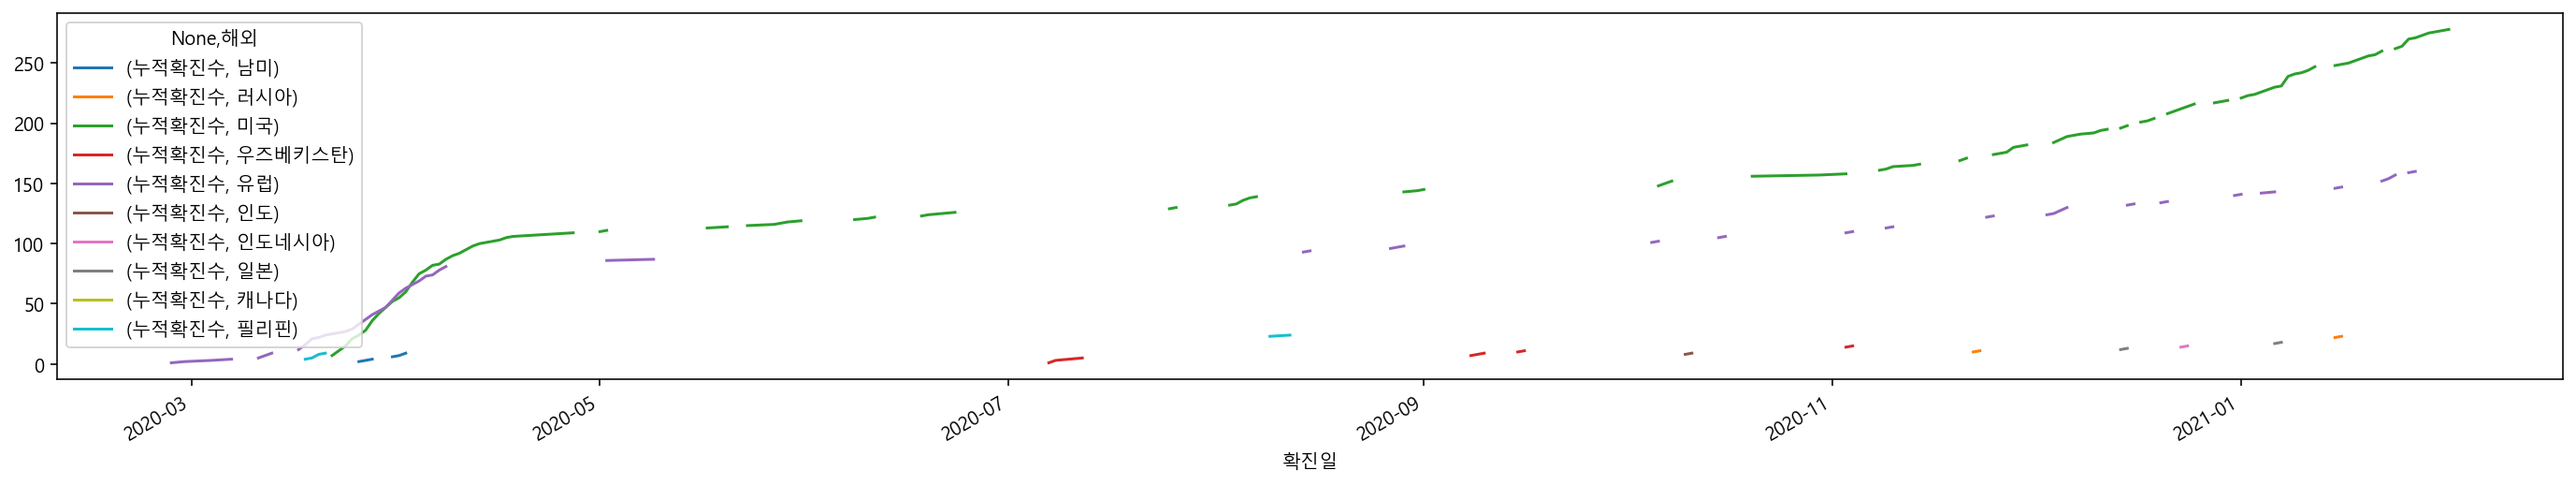

In [99]:
df_day_oversea_cumsum.pivot(columns="해외").plot(figsize=(24, 4))

여행력을 가진 누적 확진자수가 가장 많은 상위 10개 국가 중, 유럽을 여행력으로 가진 확진자가 가장 먼저 발생한 것으로 보이며, 시간이 흐를수록 미국을 여행력으로 가진 확진자에 이어 두 번째로 크게 확진자가 증가하는 경향을 보입니다.

가장 누적확진자 수가 많은 '미국'만 시각화해보면, 2020년3월 이후, 2020년12월 이후로 미국을 여행력으로 가진 확진자수가 눈에 띄게 증가함을 확인할 수 있습니다.

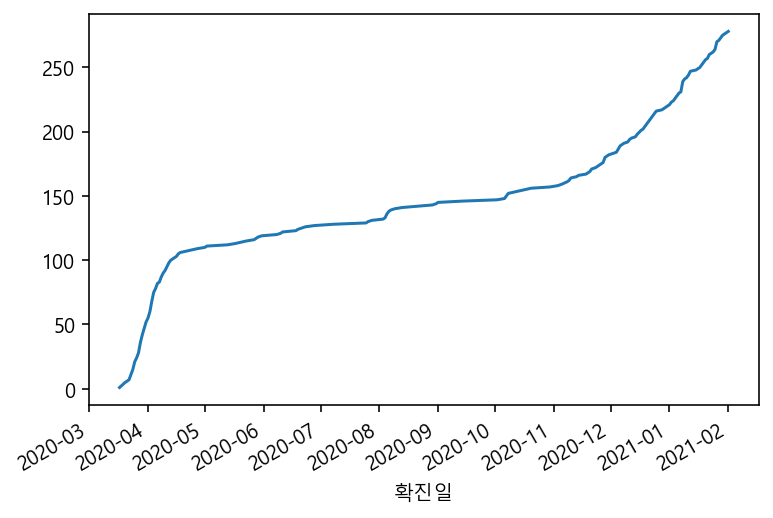

In [100]:
df_day_oversea_cumsum.loc[df_day_oversea_cumsum["해외"] == "미국", "누적확진수"].plot()

이번에는 여행력이 존재하는 확진자가 거주하는 지역을 분석합니다.

In [101]:
oversea_count_gu = df_oversea["거주지"].value_counts()
oversea_count_gu

강남구     84
기타      62
용산구     62
마포구     61
서초구     49
송파구     45
동작구     35
성북구     33
강동구     33
서대문구    32
강서구     29
노원구     27
성동구     26
타시도     26
은평구     22
관악구     22
종로구     20
영등포구    19
도봉구     18
동대문구    16
양천구     15
중구      15
중랑구     14
광진구     14
강북구     11
구로구      7
금천구      3
Name: 거주지, dtype: int64

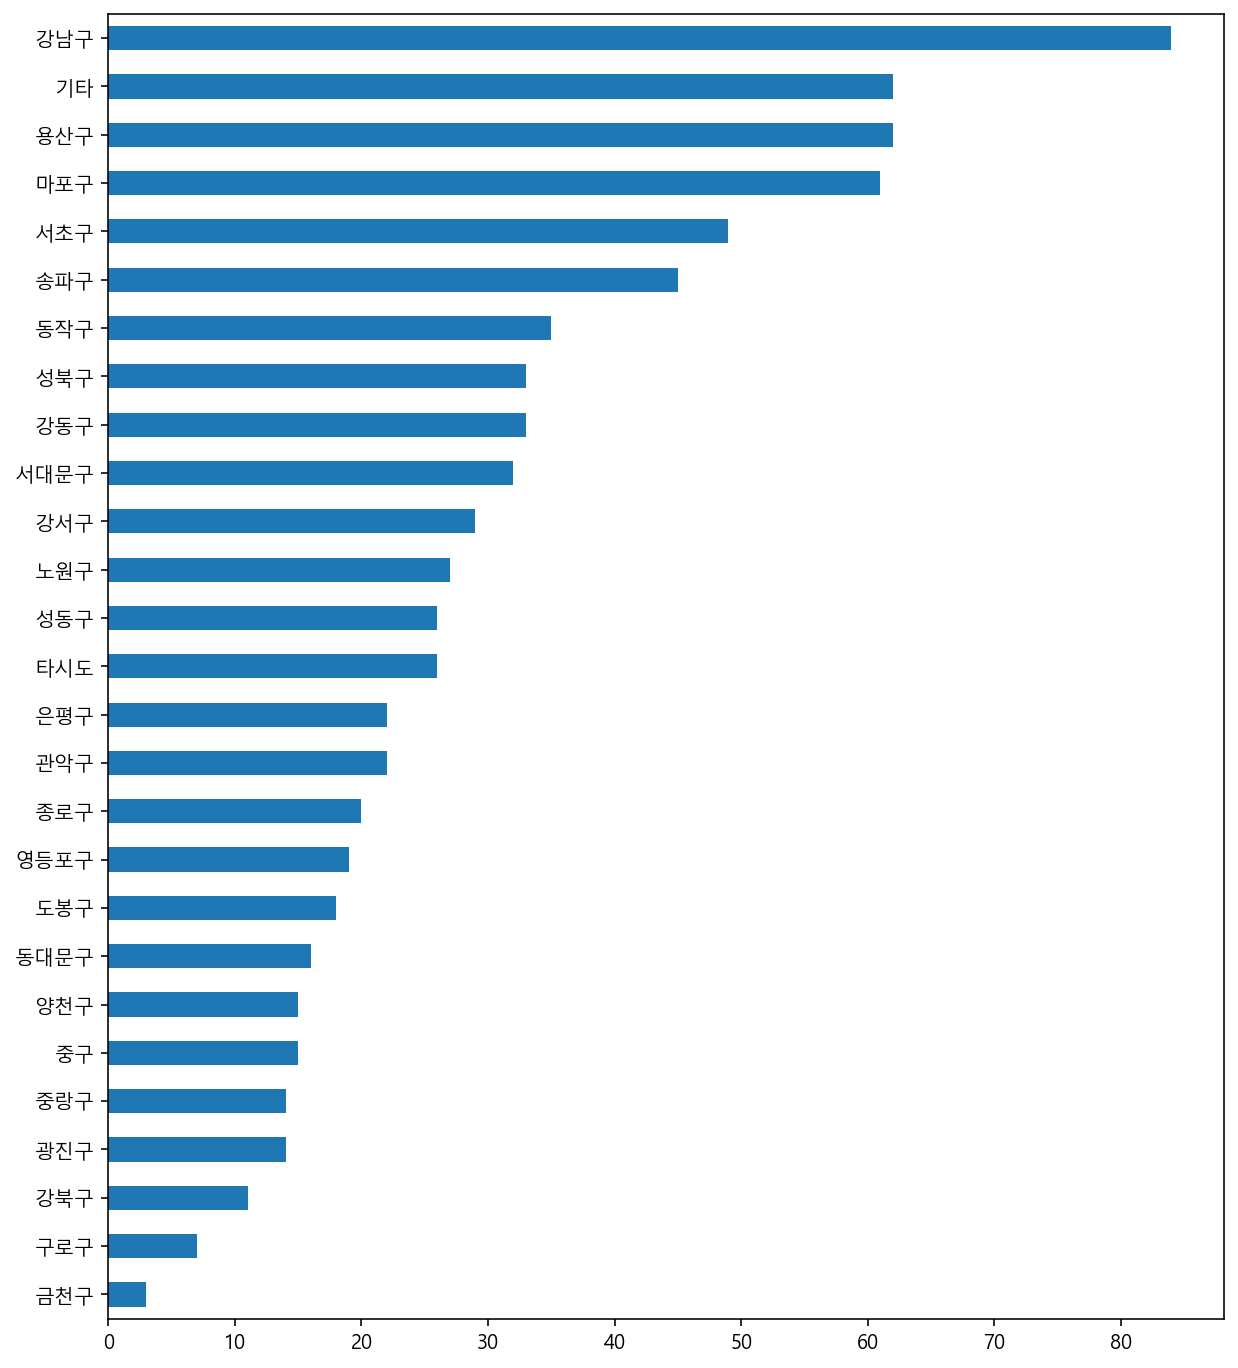

In [102]:
oversea_count_gu.sort_values().plot.barh(figsize=(10,12))

여행력을 가진 확진자는 강남구에 가장 많이 거주하고 있으며, 용산구, 기타, 마포구 순으로 많이 거주하고 있습니다.

## 전체 확진자 수와 여행력을 가진(=해외유입) 확진자 수 비교

* 1) 전체 확진자 수

In [103]:
all_count_gu = df["거주지"].value_counts()
all_count_gu

기타      1835
강서구     1562
송파구     1364
관악구     1192
강남구     1165
타시도     1135
노원구     1037
성북구     1029
동작구     1011
중랑구     1008
은평구      976
서초구      972
양천구      900
동대문구     893
영등포구     887
마포구      855
구로구      787
강동구      750
도봉구      745
서대문구     664
강북구      629
성동구      592
광진구      590
용산구      533
종로구      515
금천구      396
중구       373
Name: 거주지, dtype: int64

In [104]:
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
기타,1835
강서구,1562
송파구,1364
관악구,1192
강남구,1165
타시도,1135
노원구,1037
성북구,1029
동작구,1011
중랑구,1008


* 2) 여행력을 가진(=해외유입) 확진자 수

In [105]:
df_oversea_gu = pd.DataFrame({"여행력존재확진수": oversea_count_gu})
df_oversea_gu

,여행력존재확진수
강남구,84
기타,62
용산구,62
마포구,61
서초구,49
송파구,45
동작구,35
성북구,33
강동구,33
서대문구,32


## merge를 통해 전체 확진자 수와 여행력을 가진(=해외유입) 확진자 수 비교하기
위에서 계산한 전체 확진자중에 여행력을 가진 확진자 비율을 분석합니다.

In [106]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case

,전체확진수,여행력존재확진수
기타,1835,62
강서구,1562,29
송파구,1364,45
관악구,1192,22
강남구,1165,84
타시도,1135,26
노원구,1037,27
성북구,1029,33
동작구,1011,35
중랑구,1008,14


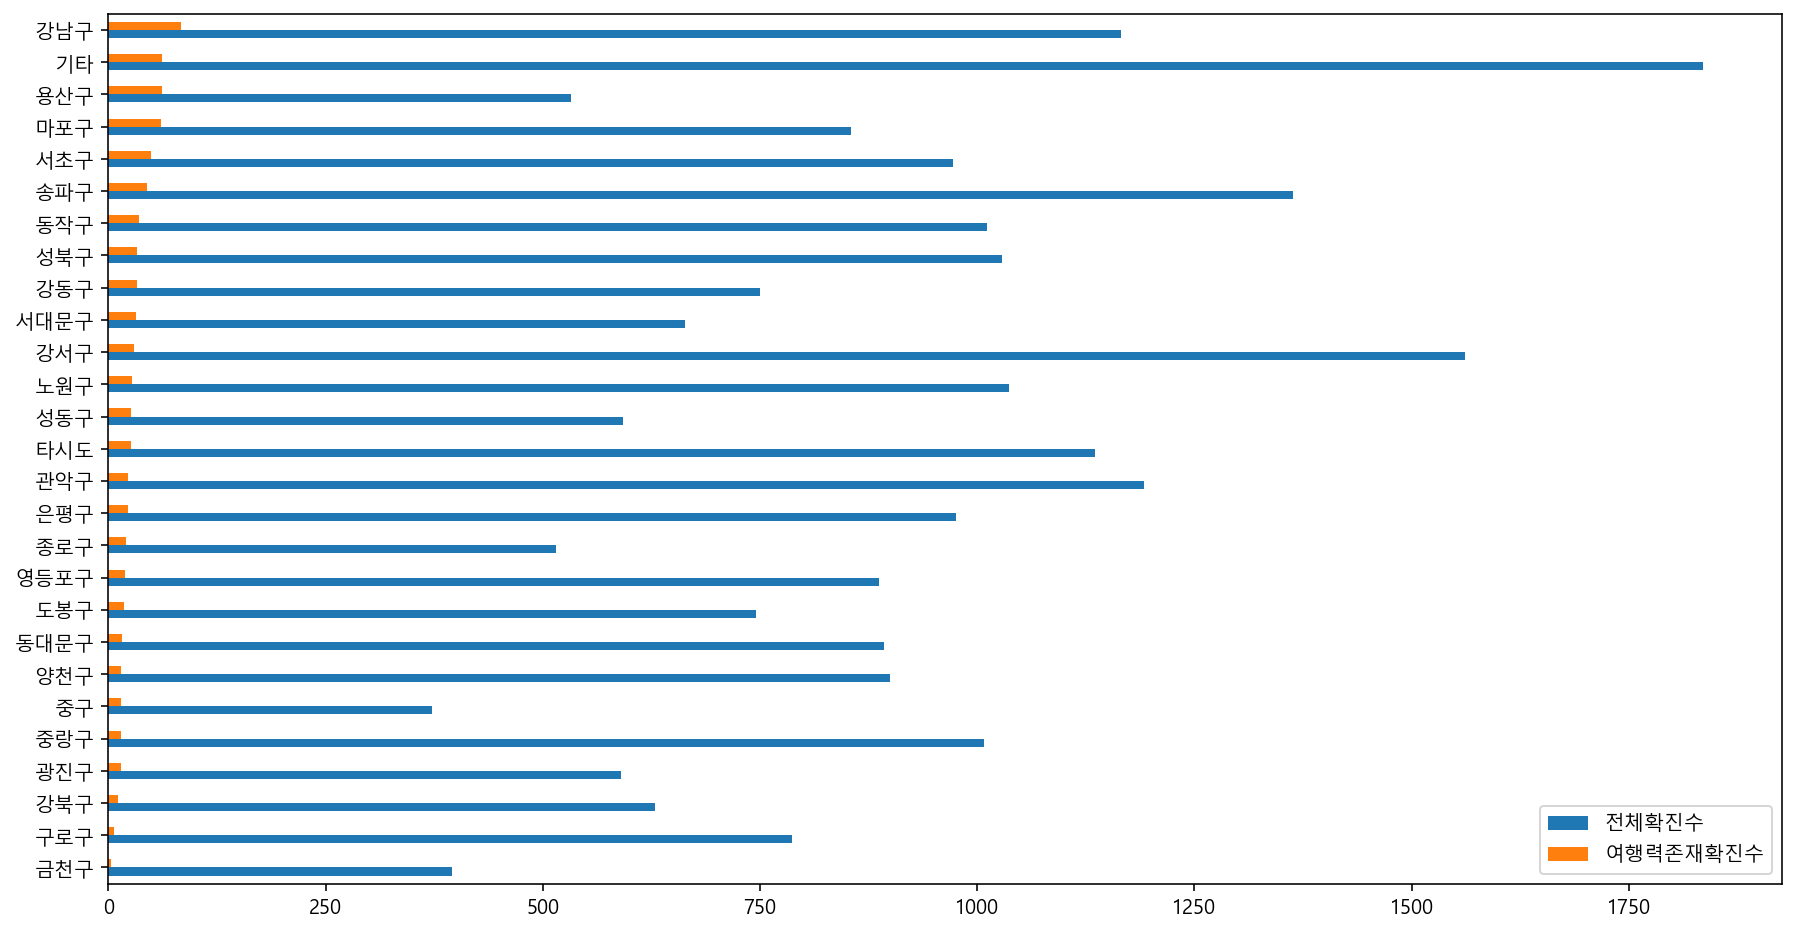

In [107]:
df_all_oversea_case.sort_values(by="여행력존재확진수").plot.barh(figsize=(15,8))

In [108]:
df_all_oversea_case["비율"] = (df_all_oversea_case["여행력존재확진수"] / df_all_oversea_case["전체확진수"])*100
df_all_oversea_case.sort_values(by="비율", ascending=False)

,전체확진수,여행력존재확진수,비율
용산구,533,62,11.632270
강남구,1165,84,7.210300
마포구,855,61,7.134503
서초구,972,49,5.041152
서대문구,664,32,4.819277
강동구,750,33,4.400000
성동구,592,26,4.391892
중구,373,15,4.021448
종로구,515,20,3.883495
동작구,1011,35,3.461919


전체 확진자 중에 여행력이 존재하는 확진자 비율은 용산구, 강남구, 마포구, 서초구 순으로 크다.

## 여행력을 가진 확진자의 퇴원 여부
여행력을 가진 확진자가 얼마나 많이 퇴원했는지 분석하였고, 모든 거주지에서 퇴원 횟수가 많다는 것을 알 수 있습니다. 보통 확진자의 거주지와 가까운 병원에 입원할텐데, 서울 모든 지역의 병원이 치료를 잘 해내고 있음을 유추 해볼 수 있습니다.

In [109]:
df_oversea.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,주,퇴원,사망,해외
1596,22799,73334,2021-01-19,용산구,독일,해외유입,NaN,2021,1,3,False,False,유럽


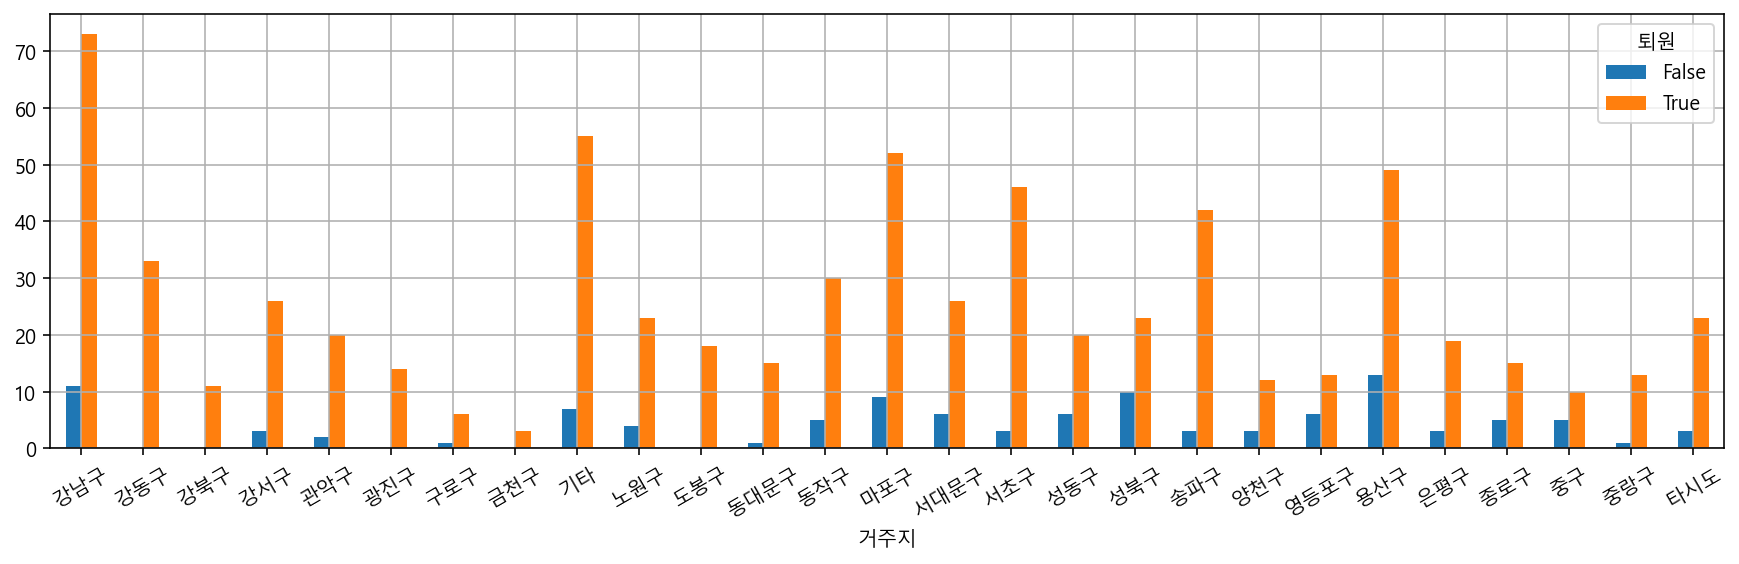

In [110]:
oversea_finish_count = df_oversea.groupby(["거주지", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(rot=30, figsize=(15,4))
plt.grid(True)

확진자의 각 거주지 별 퇴원 확률을 분석한 결과, 모든 거주지에서 확진자의 대부분은 퇴원함을 알 수 있다. 다만, 서울 중구에 거주하는 확진자의 퇴원 비율이 약 66.7%이다.

In [111]:
oversea_finish_count_prop = pd.DataFrame(oversea_finish_count.loc[:,True] / (oversea_finish_count.loc[:,False] + oversea_finish_count.loc[:,True]))
oversea_finish_count_prop = oversea_finish_count_prop.rename(columns={0: "퇴원비율"}).sort_values(by="퇴원비율")
oversea_finish_count_prop

,퇴원비율
거주지,
중구,0.666667
영등포구,0.684211
성북구,0.696970
종로구,0.750000
성동구,0.769231
용산구,0.790323
양천구,0.800000
서대문구,0.812500
노원구,0.851852


## 월별 여행력을 가진 확진자 수
2020년2월 이후로 여행력을 가진 확진자 수가 폭증했다가 감소 후, 9월 이후로 다시 확진자가 증가했다. 
2021년은 전년도 12월에 이어 여행력을 가진 확진자 수가 많았다.

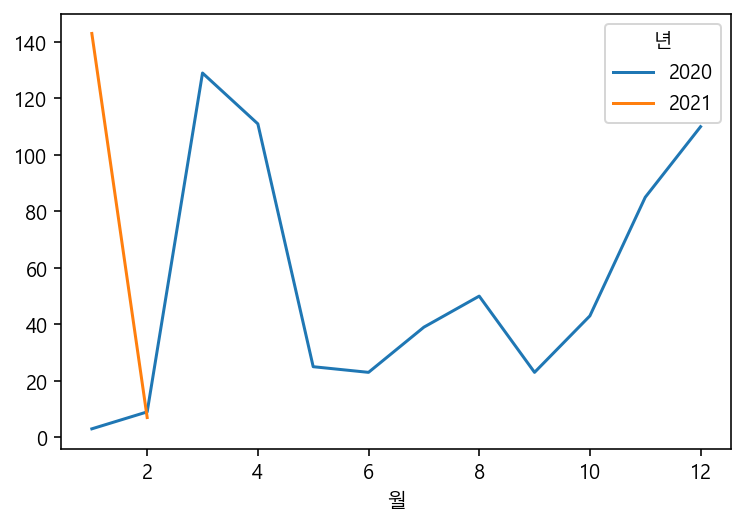

In [112]:
df_oversea.groupby(["월", "년"])["연번"].count().unstack().plot()

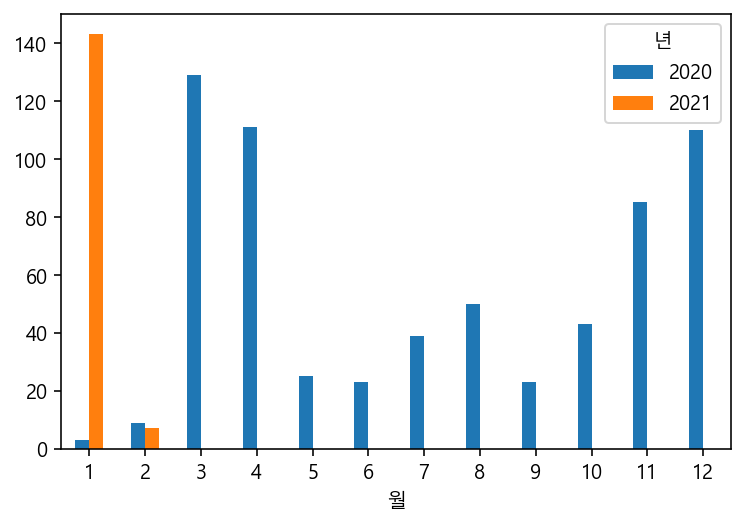

In [113]:
df_oversea.groupby(["월", "년"])["연번"].count().unstack().plot.bar(rot=0)

## 월, 거주지 별 여행력을 가진 확진자 수
월, 거주지 별 여행력을 가진 확진자 수를 분석합니다. table 형태 데이터로 만들기 위해 3가지 방식(groupby, crosstab, pivot_table)을 사용합니다.

### groupby로 빈도수 구하기
2020년, 2021년으로 데이터를 분리하여 .groupby()를 사용합니다.

In [114]:
# 2020년
month_gu_2020 = df_oversea[df_oversea["년"]==2020].groupby(["월", "거주지"])["연번"].count().unstack()
month_gu_2020 = month_gu_2020.fillna(0).astype(int)
month_gu_2020.style.background_gradient(cmap="Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,2,3,3,2,8,6,2,14,2,4,12,1,4,6,2,2,2,5,6
4,16,3,0,3,5,2,0,0,5,2,2,4,4,7,5,11,10,5,8,1,3,5,3,0,0,1,6
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,1,1,0,1,1,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,2,1,1,1,2,1,0,2,1,1,1,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,2
8,1,0,0,2,2,1,0,0,13,1,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,1
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,1


여행력을 가지는 확진자가 증가한 2020년3월, 4월에는 확진자의 거주지가 다양합니다.. 2차 증가 시점인 2020년12월 전까지는 8월에 기타 지역에서 13명이 발생한 경우도 확인할 수 있습니다. 2020년12월에는 3월과 비슷하게 여행력을 가지는 확진자의 거주지가 다양합니다.

In [115]:
# 2021년
month_gu_2021 = df_oversea[df_oversea["년"]==2021].groupby(["월", "거주지"])["연번"].count().unstack()
month_gu_2021 = month_gu_2021.fillna(0).astype(int)
month_gu_2021.style.background_gradient(cmap="Greens")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13,2,4,4,1,3,2,7,7,1,3,6,10,5,8,3,12,5,3,8,17,4,6,4,3,2
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0


2021년1월에는 여행력을 가진 확진자의 거주지가 용산구, 강남구, 성북구 순으로 많으며, 다양한 지역에 거주하고 있음을 확인할 수 있습니다.

### crosstab으로 빈도수 구하기
2020년, 2021년으로 데이터를 분리하여 pd.crosstab()를 사용합니다.

In [116]:
# 2020년
month_gu_2020 = pd.crosstab(df_oversea[df_oversea["년"]==2020]["월"], df_oversea["거주지"])
month_gu_2020.style.bar()

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,2,3,3,2,8,6,2,14,2,4,12,1,4,6,2,2,2,5,6
4,16,3,0,3,5,2,0,0,5,2,2,4,4,7,5,11,10,5,8,1,3,5,3,0,0,1,6
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,1,1,0,1,1,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,2,1,1,1,2,1,0,2,1,1,1,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,2
8,1,0,0,2,2,1,0,0,13,1,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,1
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,1


In [117]:
# 2021년
month_gu_2021 = pd.crosstab(df_oversea[df_oversea["년"]==2021]["월"], df_oversea["거주지"])
month_gu_2021.style.bar()

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13,2,4,4,1,3,2,7,7,1,3,6,10,5,8,3,12,5,3,8,17,4,6,4,3,2
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0


### pivot_table로 빈도수 구하기
2020년, 2021년으로 데이터를 분리하여 pivot_table()을 사용합니다. "월" 칼럼 데이터들이 중복되므로, pivot_table()와 aggfunc 인자를 사용합니다. 또한, 

In [118]:
# 칼럼 개수가 많아서 30개로 제한을 둠!
#pd.options.display.max_columns = 30

In [130]:
# 2020년
month_gu_2020 = pd.pivot_table(df_oversea[df_oversea["년"]==2020], index="월", columns="거주지", values="연번", aggfunc='count', fill_value=0)
month_gu_2020.style.highlight_max()

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,2,3,3,2,8,6,2,14,2,4,12,1,4,6,2,2,2,5,6
4,16,3,0,3,5,2,0,0,5,2,2,4,4,7,5,11,10,5,8,1,3,5,3,0,0,1,6
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,1,1,0,1,1,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,2,1,1,1,2,1,0,2,1,1,1,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,2
8,1,0,0,2,2,1,0,0,13,1,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,1
9,4,1,0,0,0,0,0,0,6,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,1


In [132]:
# 2021년
month_gu_2021 = pd.pivot_table(df_oversea[df_oversea["년"]==2021], index="월", columns="거주지", values="연번", aggfunc='count', fill_value=0)
month_gu_2021

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,기타,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
월,,,,,,,,,,,,,,,,,,,,,
1,13,2,4,4,1,3,2,7,7,1,...,12,5,3,8,17,4,6,4,3,2
2,1,0,0,0,0,0,0,0,0,0,...,3,0,0,0,1,0,0,0,0,0


## 여행력을 가진 확진자가 많이 거주하는 지역(구)
2020년과 2021년을 분리하여 여행력을 가진 확진자가 많이 거주하는 상위 5개 지역의 월별 확진자 분포를 분석합니다.

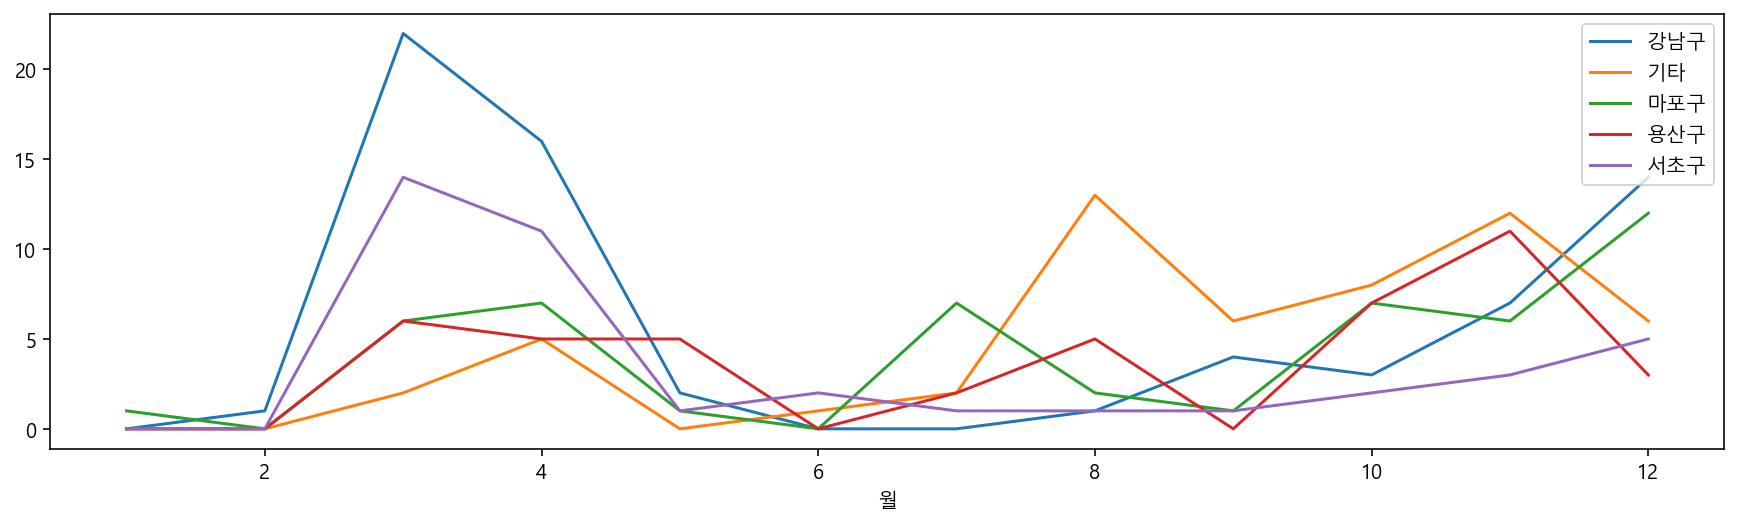

In [121]:
# 2020년
top_oversea_gu_2020 = df_oversea[df_oversea["년"]==2020]["거주지"].value_counts().head().index
g = month_gu_2020[top_oversea_gu_2020].plot(figsize=(15, 4))
g.legend(loc=1)

여행력을 가진 확진자가 증가하는 2020년3월에는 상위 5개 지역에서 거주하는 확진자가 증가합니다. 7월에는 마포구에 거주하는 여행력을 가진 확진자가 증가하며, 8월에는 기타 지역에 거주하는 여행력을 가진 확진자가 증가합니다. 11월 이후에는 기타 지역과 용산구에 거주하는 여행력을 가진 확진자가 감소하는 반면, 강남구, 마포구, 서초구에 거주하는 여행력을 가진 확진자가 증가합니다.

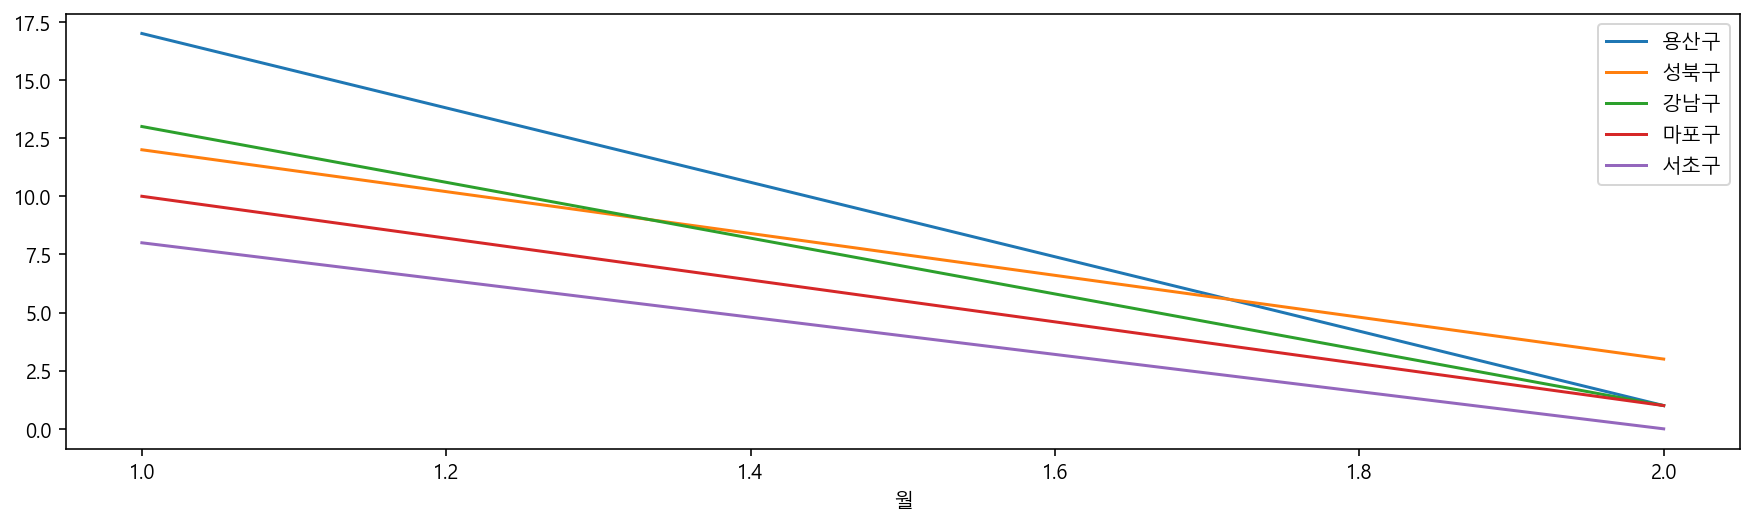

In [122]:
# 2021년
top_oversea_gu_2021 = df_oversea[df_oversea["년"]==2021]["거주지"].value_counts().head().index
g = month_gu_2021[top_oversea_gu_2021].plot(figsize=(15, 4))
g.legend(loc=1)

2021년은1월 한 달치 데이터만 존재하므로, 아직 정확한 추이를 알기 어렵습니다.

## 구별 해외유입 국가 분석하기

### groupby로 빈도수 구하기
2020년, 2021년으로 데이터를 분리하고, 각 연도별 여행력이 많은 국가 10개를 토대로 가지고 .groupby()를 사용합니다.

In [152]:
# 2020년
df_oversea_2020 = df_oversea[(df_oversea["년"]==2020)]
top_country_2020 = df_oversea_2020["해외"].value_counts()[:10].index

group_oversea_gu_2020 = df_oversea_2020[df_oversea_2020["해외"].isin(top_country_2020)].groupby(["해외", "거주지"])["연번"].count().unstack()
group_oversea_gu_2020.fillna(0).astype(int).style.background_gradient("Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,
남미,3,1,1,1,0,0,0,0,2,1,3,1,1,5,2,1,0,1,1,0,0,0,2,0,0,0,2
러시아,1,1,0,0,1,0,0,2,1,1,0,0,1,4,1,0,0,1,0,0,0,1,1,0,2,1,1
미국,41,11,3,6,5,3,2,0,10,4,6,4,4,8,5,22,15,9,14,4,4,11,5,7,1,4,11
우즈베키스탄,0,3,0,3,0,0,0,0,2,2,0,1,0,3,1,0,0,0,0,1,0,0,0,0,1,1,0
유럽,18,5,1,3,6,5,1,0,12,4,3,2,6,9,6,12,3,4,13,1,5,12,3,1,2,1,2
인도,0,2,0,0,0,0,0,0,2,1,2,0,1,1,1,0,0,0,2,0,0,2,0,1,0,0,0
인도네시아,1,0,0,0,0,0,0,0,2,2,0,0,1,2,3,1,0,1,0,0,0,1,0,1,0,0,0
일본,3,0,0,0,1,1,0,0,0,1,0,0,0,3,0,2,1,0,0,0,0,1,0,1,0,0,1
중국,0,0,0,3,0,0,0,1,2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2


In [153]:
# 2021년
df_oversea_2021 = df_oversea[(df_oversea["년"]==2021)]
top_country_2021 = df_oversea_2021["해외"].value_counts()[:10].index

group_oversea_gu_2021 = df_oversea_2021[df_oversea_2021["해외"].isin(top_country_2021)].groupby(["해외", "거주지"])["연번"].count().unstack()
group_oversea_gu_2021.fillna(0).astype(int).style.background_gradient("Greens")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
해외,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
러시아,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0
미국,9,1,3,1,1,2,0,0,1,0,3,4,4,2,5,1,5,1,0,8,2,3,3,0,0
스리랑카,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
유럽,0,1,0,2,0,0,0,1,3,0,0,0,1,1,0,1,3,1,1,0,4,1,2,0,0
인도네시아,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
일본,0,0,1,0,0,1,0,0,1,0,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0
캐나다,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
탄자니아,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0


### pivot table로 구하기
2020년, 2021년으로 데이터를 분리하여 .pivot_table()을 사용합니다.

In [155]:
# 2020년
group_oversea_gu_2020 = pd.pivot_table(df_oversea_2020[df_oversea_2020["해외"].isin(top_country_2020)], index="해외", columns="거주지", values="연번", aggfunc='count', fill_value=0)
group_oversea_gu_2020.style.background_gradient(cmap="Blues")

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,
남미,3,1,1,1,0,0,0,0,2,1,3,1,1,5,2,1,0,1,1,0,0,0,2,0,0,0,2
러시아,1,1,0,0,1,0,0,2,1,1,0,0,1,4,1,0,0,1,0,0,0,1,1,0,2,1,1
미국,41,11,3,6,5,3,2,0,10,4,6,4,4,8,5,22,15,9,14,4,4,11,5,7,1,4,11
우즈베키스탄,0,3,0,3,0,0,0,0,2,2,0,1,0,3,1,0,0,0,0,1,0,0,0,0,1,1,0
유럽,18,5,1,3,6,5,1,0,12,4,3,2,6,9,6,12,3,4,13,1,5,12,3,1,2,1,2
인도,0,2,0,0,0,0,0,0,2,1,2,0,1,1,1,0,0,0,2,0,0,2,0,1,0,0,0
인도네시아,1,0,0,0,0,0,0,0,2,2,0,0,1,2,3,1,0,1,0,0,0,1,0,1,0,0,0
일본,3,0,0,0,1,1,0,0,0,1,0,0,0,3,0,2,1,0,0,0,0,1,0,1,0,0,1
중국,0,0,0,3,0,0,0,1,2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2


In [156]:
# 2021년
group_oversea_gu_2021 = pd.pivot_table(df_oversea_2021[df_oversea_2021["해외"].isin(top_country_2021)], index="해외", columns="거주지", values="연번", aggfunc='count', fill_value=0)
group_oversea_gu_2021.style.background_gradient(cmap='Greens')

거주지,강남구,강동구,강북구,강서구,관악구,광진구,구로구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
해외,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
러시아,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0
미국,9,1,3,1,1,2,0,0,1,0,3,4,4,2,5,1,5,1,0,8,2,3,3,0,0
스리랑카,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
유럽,0,1,0,2,0,0,0,1,3,0,0,0,1,1,0,1,3,1,1,0,4,1,2,0,0
인도네시아,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
일본,0,0,1,0,0,1,0,0,1,0,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0
캐나다,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
탄자니아,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0


2020년, 2021년 모두 미국과 유럽, 필리핀에 여행력을 가진 확진자는 다양한 지역에 거주합니다.